# Część pierwsza

# Analiza eksploracyjna posiadanego zbioru i postawienie tezy/zadania badawczego mającego na celu opracowanie modelu regresji dla opisanych danych.

**Alesandra Kowalczyk 307414, Martyna Jakubowska 307351**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Wczytanie danych**

In [2]:
data = pd.read_csv("players_21.csv")
data

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   33   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35   
2               J. Oblak                            Jan Oblak   27   
3         R. Lewandowski                   Robert Lewandowski   31   
4              Neymar Jr        Neymar da Silva Santos Júnior   28   
...                  ...                                  ...  ...   
18939          K. Angulo                         Kevin Angulo   24   
18940     Zhang Mengxuan                       Mengxuan Zhang   21   
18941      Wang Zhenghao                                  王政豪   20   
18942        Chen Zitong                          Zitong Chen   23   
18943           Song Yue                             Yue Song   28   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1993-01-07        188         87    Slovenia   
3      1988-08-21        184         80      Poland   
4      1992-02-05        175         68      Brazil   
...           ...        ...        ...         ...   
18939  1996-04-13        176         73    Colombia   
18940  1999-04-26        177         70    China PR   
18941  2000-06-28        185         74    China PR   
18942  1997-02-20        186         80    China PR   
18943  1991-11-20        185         79    China PR   

                                 club_name  ...   lwb   ldm   cdm   rdm   rwb  \
0                             FC Barcelona  ...  66+3  65+3  65+3  65+3  66+3   
1                                 Juventus  ...  65+3  61+3  61+3  61+3  65+3   
2                          Atlético Madrid  ...  32+3  36+3  36+3  36+3  32+3   
3                        FC Bayern München  ...  64+3  65+3  65+3  65+3  64+3   
4                      Paris Saint-Germain  ...  67+3  62+3  62+3  62+3  67+3   
...                                    ...  ...   ...   ...   ...   ...   ...   
18939                      América de Cali  ...  47+2  47+2  47+2  47+2  47+2   
18940  Chongqing Dangdai Lifan FC SWM Team  ...  42+2  41+2  41+2  41+2  42+2   
18941                      Tianjin TEDA FC  ...  42+2  42+2  42+2  42+2  42+2   
18942        Shijiazhuang Ever Bright F.C.  ...  47+2  49+2  49+2  49+2  47+2   
18943                      Tianjin TEDA FC  ...  47+0  47+0  47+0  47+0  47+0   

         lb   lcb    cb   rcb    rb  
0      62+3  52+3  52+3  52+3  62+3  
1      61+3  54+3  54+3  54+3  61+3  
2      32+3  33+3  33+3  33+3  32+3  
3      61+3  60+3  60+3  60+3  61+3  
4      62+3  49+3  49+3  49+3  62+3  
...     ...   ...   ...   ...   ...  
18939  47+2  46+2  46+2  46+2  47+2  
18940  45+2  47+2  47+2  47+2  45+2  
18941  44+2  47+2  47+2  47+2  44+2  
18942  47+2  49+2  49+2  49+2  47+2  
18943  47+0  46+1  46+1  46+1  47+0  

[18944 rows x 106 columns]

In [3]:
print(data.columns.values)

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club_name' 'league_name' 'league_rank'
 'overall' 'potential' 'value_eur' 'wage_eur' 'player_positions'
 'preferred_foot' 'international_reputation' 'weak_foot' 'skill_moves'
 'work_rate' 'body_type' 'real_face' 'release_clause_eur' 'player_tags'
 'team_position' 'team_jersey_number' 'loaned_from' 'joined'
 'contract_valid_until' 'nation_position' 'nation_jersey_number' 'pace'
 'shooting' 'passing' 'dribbling' 'defending' 'physic' 'gk_diving'
 'gk_handling' 'gk_kicking' 'gk_reflexes' 'gk_speed' 'gk_positioning'
 'player_traits' 'attacking_crossing' 'attacking_finishing'
 'attacking_heading_accuracy' 'attacking_short_passing'
 'attacking_volleys' 'skill_dribbling' 'skill_curve' 'skill_fk_accuracy'
 'skill_long_passing' 'skill_ball_control' 'movement_acceleration'
 'movement_sprint_speed' 'movement_agility' 'movement_reactions'
 'movement_balance' 'power_shot_power' 'power_jumping' 'pow

**Usuwamy niepotrzebne kolumny:**

In [4]:
data.drop(['sofifa_id', 'player_url' ,'short_name' ,'long_name' , 'dob' ,
 'preferred_foot' ,'international_reputation' ,
 'work_rate' ,'body_type' ,'real_face', 'release_clause_eur' ,'player_tags',
 'team_jersey_number' , 'joined','contract_valid_until' , 'nation_jersey_number' ,
 'player_traits', 'defending_marking' ,'ls' ,'st' ,'rs' ,'lw', 'lf',
 'cf', 'rf', 'rw' ,'lam' ,'cam', 'ram' ,'lm' ,'lcm', 'cm', 'rcm' ,'rm' ,'lwb', 'ldm',
 'cdm', 'rdm', 'rwb', 'lb' ,'lcb' ,'cb' ,'rcb', 'rb'], axis=1, inplace=True)

Kolumny, które usunęłyśmy zawierają informację podstawowe o zawodnikach (np. numer Sofifa, imię, nazwisko, data urodzenia, numer koszulki, informacja kiedy dokonany został transfer do klubu, długość kontaktu, informacje o kontrakcie), które identyfikują piłkarza, ale nie są istotne dla naszej analizy.
Usunęłyśmy rownież kolumny związane tylko i wyłącznie z grą fifa takie jak informacja czy postać ma prawdziwą twarz zawodnika albo jaką sylwetkę ma przypisaną. Ostatnią grupę usuniętych kolumn stanowią informacje o wszystkich możliwych pozycjach na jakich mogą grać gracze.

**Informacja o ilości atrybutów i ilości obiektów:**

In [5]:
ile_pilkarzy = data.count(0)
ile_atrybutow = data.count(1)
print("liczba piłkarzy:", max(ile_pilkarzy), "\nliczba atrybutów:", max(ile_atrybutow))

liczba piłkarzy: 18944 
liczba atrybutów: 56


**Analiza stopnia wypełnienia danych - braki w danych:**

In [6]:
def countNan(df):
    columns = pd.isnull(df).sum().to_dict()
    return  columns

In [7]:
print(countNan(data))

{'age': 0, 'height_cm': 0, 'weight_kg': 0, 'nationality': 0, 'club_name': 225, 'league_name': 225, 'league_rank': 225, 'overall': 0, 'potential': 0, 'value_eur': 0, 'wage_eur': 0, 'player_positions': 0, 'weak_foot': 0, 'skill_moves': 0, 'team_position': 225, 'loaned_from': 18186, 'nation_position': 17817, 'pace': 2083, 'shooting': 2083, 'passing': 2083, 'dribbling': 2083, 'defending': 2083, 'physic': 2083, 'gk_diving': 16861, 'gk_handling': 16861, 'gk_kicking': 16861, 'gk_reflexes': 16861, 'gk_speed': 16861, 'gk_positioning': 16861, 'attacking_crossing': 0, 'attacking_finishing': 0, 'attacking_heading_accuracy': 0, 'attacking_short_passing': 0, 'attacking_volleys': 0, 'skill_dribbling': 0, 'skill_curve': 0, 'skill_fk_accuracy': 0, 'skill_long_passing': 0, 'skill_ball_control': 0, 'movement_acceleration': 0, 'movement_sprint_speed': 0, 'movement_agility': 0, 'movement_reactions': 0, 'movement_balance': 0, 'power_shot_power': 0, 'power_jumping': 0, 'power_stamina': 0, 'power_strength': 0

In [8]:
print('Ilość wartości brakujących: ', data.isnull().sum().sum())

Ilość wartości brakujących:  150567


Widzimy, że kilka kolumn zawiera braki, w niektórych przypadkach kolumny mają prawie 90% braków, 
dlatego przyjrzymy się bliżej naszym danym:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18944 non-null  int64  
 1   height_cm                   18944 non-null  int64  
 2   weight_kg                   18944 non-null  int64  
 3   nationality                 18944 non-null  object 
 4   club_name                   18719 non-null  object 
 5   league_name                 18719 non-null  object 
 6   league_rank                 18719 non-null  float64
 7   overall                     18944 non-null  int64  
 8   potential                   18944 non-null  int64  
 9   value_eur                   18944 non-null  int64  
 10  wage_eur                    18944 non-null  int64  
 11  player_positions            18944 non-null  object 
 12  weak_foot                   18944 non-null  int64  
 13  skill_moves                 189

Atrubuty zaczynające się od "gk" dotyczą samych bramkarzy, dlatego braki w tej kolumnie stanowią blisko 90%.
Po dokładniejszej analizie wyników możemy zauważyć, że ilość danych dla arybutów: " pace, shooting, passing, dribbling, defending, physic," jest równa dokałnie różnicy między liczbą wszystkich piłkarzy a liczbą bramkarzy - możemy więc wnioskować, że te atrybuty dotyczą tylko piłkarzy nie-bramkarzy.
Zdecydowałyśmy się na usunięcie tych kolumn, ponieważ zależy nam na atrybutach opisujących wszystkich piłkazy a nie konkretne grupy jak w tym przypadku( bramkarze - pozostali zawodnicy).

Usuwamy również kolumnę z informacją o poprzednim klubie piłkarza, ponieważ prawie 96% zawodników nie ma wpisanej tej informacji, a także usuwamy informcje o pozycji w reprezentacji narodowej z tego samego powodu (ponad 94% zawodników nie ma przypisanej tej informacji)

In [10]:
data.drop(['loaned_from' , 'nation_position' , 'pace',
 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
 'gk_handling' ,'gk_kicking' ,'gk_reflexes' ,'gk_speed', 'gk_positioning'], axis=1, inplace=True)

**Statystyki opisowe:**

In [11]:
pd.set_option('max_columns', None)
data.describe()

age     height_cm     weight_kg   league_rank       overall  \
count  18944.000000  18944.000000  18944.000000  18719.000000  18944.000000   
mean      25.225823    181.190773     75.016892      1.357070     65.677787   
std        4.697354      6.825672      7.057140      0.739327      7.002278   
min       16.000000    155.000000     50.000000      1.000000     47.000000   
25%       21.000000    176.000000     70.000000      1.000000     61.000000   
50%       25.000000    181.000000     75.000000      1.000000     66.000000   
75%       29.000000    186.000000     80.000000      1.000000     70.000000   
max       53.000000    206.000000    110.000000      4.000000     93.000000   

          potential     value_eur       wage_eur     weak_foot   skill_moves  \
count  18944.000000  1.894400e+04   18944.000000  18944.000000  18944.000000   
mean      71.086729  2.224813e+06    8675.852513      2.936603      2.363017   
std        6.109985  5.102486e+06   19654.774894      0.667132      0.766469   
min       47.000000  0.000000e+00       0.000000      1.000000      1.000000   
25%       67.000000  3.000000e+05    1000.000000      3.000000      2.000000   
50%       71.000000  6.500000e+05    3000.000000      3.000000      2.000000   
75%       75.000000  1.800000e+06    7000.000000      3.000000      3.000000   
max       95.000000  1.055000e+08  560000.000000      5.000000      5.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        18944.000000         18944.000000                18944.000000   
mean            49.612859            45.796083                   51.874578   
std             18.153057            19.592269                   17.321709   
min              6.000000             3.000000                    5.000000   
25%             38.000000            30.000000                   44.000000   
50%             54.000000            49.000000                   55.000000   
75%             63.000000            62.000000                   64.000000   
max             94.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count             18944.000000       18944.000000     18944.000000   
mean                 58.705448          42.669552        55.546400   
std                  14.572383          17.661569        18.787112   
min                   7.000000           3.000000         5.000000   
25%                  54.000000          30.000000        49.000000   
50%                  62.000000          44.000000        61.000000   
75%                  68.000000          56.000000        68.000000   
max                  94.000000          90.000000        96.000000   

        skill_curve  skill_fk_accuracy  skill_long_passing  \
count  18944.000000       18944.000000        18944.000000   
mean      47.187289          42.356155           52.653030   
std       18.231204          17.239561           15.205281   
min        4.000000           5.000000            5.000000   
25%       35.000000          31.000000           43.000000   
50%       48.000000          41.000000           56.000000   
75%       61.000000          55.000000           64.000000   
max       94.000000          94.000000           93.000000   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
count        18944.000000           18944.000000           18944.000000   
mean            58.482791              64.285103              64.326489   
std             16.598040              14.926452              14.689422   
min              5.000000              13.000000              12.000000   
25%             54.000000              57.000000              57.000000   
50%             63.000000              67.000000              67.000000   
75%             69.000000              74.000000              74.000000   
max             96.000000              97.000000              96.000000   

       movemen

Wyświelimy również informacje, jaka wartość dla danego atrybutu występuje najczęśniej:

In [12]:
data.mode()

age  height_cm  weight_kg nationality                 club_name  \
0   23.0      180.0       70.0     England           1. FSV Mainz 05   
1    NaN        NaN        NaN         NaN                 AS Monaco   
2    NaN        NaN        NaN         NaN          AS Saint-Étienne   
3    NaN        NaN        NaN         NaN                Angers SCO   
4    NaN        NaN        NaN         NaN                   Arsenal   
5    NaN        NaN        NaN         NaN               Aston Villa   
6    NaN        NaN        NaN         NaN                  Atalanta   
7    NaN        NaN        NaN         NaN           Atlético Madrid   
8    NaN        NaN        NaN         NaN                 Benevento   
9    NaN        NaN        NaN         NaN                   Bologna   
10   NaN        NaN        NaN         NaN  Borussia Mönchengladbach   
11   NaN        NaN        NaN         NaN    Brighton & Hove Albion   
12   NaN        NaN        NaN         NaN                   Chelsea   
13   NaN        NaN        NaN         NaN                   Crotone   
14   NaN        NaN        NaN         NaN            Crystal Palace   
15   NaN        NaN        NaN         NaN                  Cádiz CF   
16   NaN        NaN        NaN         NaN          Deportivo Alavés   
17   NaN        NaN        NaN         NaN                   Everton   
18   NaN        NaN        NaN         NaN              FC Barcelona   
19   NaN        NaN        NaN         NaN                 FC Nantes   
20   NaN        NaN        NaN         NaN                Fiorentina   
21   NaN        NaN        NaN         NaN                    Fulham   
22   NaN        NaN        NaN         NaN                     Genoa   
23   NaN        NaN        NaN         NaN                 Getafe CF   
24   NaN        NaN        NaN         NaN                Granada CF   
25   NaN        NaN        NaN         NaN             Hellas Verona   
26   NaN        NaN        NaN         NaN                     Inter   
27   NaN        NaN        NaN         NaN                LOSC Lille   
28   NaN        NaN        NaN         NaN                     Lazio   
29   NaN        NaN        NaN         NaN              Leeds United   
30   NaN        NaN        NaN         NaN            Leicester City   
31   NaN        NaN        NaN         NaN                Levante UD   
32   NaN        NaN        NaN         NaN                 Liverpool   
33   NaN        NaN        NaN         NaN           Manchester City   
34   NaN        NaN        NaN         NaN         Manchester United   
35   NaN        NaN        NaN         NaN                    Napoli   
36   NaN        NaN        NaN         NaN          Newcastle United   
37   NaN        NaN        NaN         NaN    Olympique de Marseille   
38   NaN        NaN        NaN         NaN                  RC Celta   
39   NaN        NaN        NaN         NaN       Racing Club de Lens   
40   NaN        NaN        NaN         NaN                Real Betis   
41   NaN        NaN        NaN         NaN             Real Sociedad   
42   NaN        NaN        NaN         NaN        Real Valladolid CF   
43   NaN        NaN        NaN         NaN          SV Werder Bremen   
44   NaN        NaN        NaN         NaN                  Sassuolo   
45   NaN        NaN        NaN         NaN                Sevilla FC   
46   NaN        NaN        NaN         NaN               Southampton   
47   NaN        NaN        NaN         NaN          Stade Rennais FC   
48   NaN        NaN        NaN         NaN                    Torino   
49   NaN        NaN        NaN         NaN         Tottenham Hotspur   
50   NaN        NaN        NaN         NaN                   Udinese   
51   NaN        NaN        NaN         NaN               Valencia CF   
52   NaN        NaN        NaN         NaN             VfB Stuttgart   
53   NaN        NaN        NaN         NaN           West Ham United   
54   NaN        NaN        NaN         NaN   

Skośność:

In [13]:
data.skew()

age                           0.409750
height_cm                    -0.032281
weight_kg                     0.223907
league_rank                   2.155599
overall                       0.089313
potential                     0.217394
value_eur                     6.727281
wage_eur                      7.484533
weak_foot                     0.219654
skill_moves                   0.225260
attacking_crossing           -0.612091
attacking_finishing          -0.342346
attacking_heading_accuracy   -0.861571
attacking_short_passing      -1.147469
attacking_volleys            -0.169532
skill_dribbling              -1.132786
skill_curve                  -0.257416
skill_fk_accuracy             0.120788
skill_long_passing           -0.583203
skill_ball_control           -1.336669
movement_acceleration        -0.862678
movement_sprint_speed        -0.873813
movement_agility             -0.627599
movement_reactions           -0.118325
movement_balance             -0.602555
power_shot_power         

**Wnioski:**

Analizując statystyki opisowe widzimy, że nasze dane mają dość szeroki zakres danych, ponieważ dla wielu atrybutów istnieje spora różnica między wartością średnią a wartością minimalną lub maksymalną.
Dla każdego atrybutu oprócz nazwy klubu piłkarskiego mamy dokładnie jedną cechę która występuje największą ilość razy. Dla klubu piłkarskiego. mamy aż 54 wartości które występują największą ilość razy(każda wartość tyle samo razy).

W większości przypadków cechy najczęściej występujące lepiej pokrywają się z wartością kwantyla 50% niż z wartością średnią dla danego atrybutu.
Największa skośność (dodatnia) i największa wartość odchyleń standardowych (w porówaniu z wartością średnią tego atrybutu) jest dla value_eur (wartość rynkowa zawodnika) i wage_eur (pensja zawodnika). Dodatkowo dla tych dwóch atrybutów kwantyle 75% są mniejsze niż wartość średnia. Przez to możemy wnioskować, że jest pewna mała część piłkarzy, którzy mają dużo większą wartość rynkową i pensje w porównianiu z pozostałymi.

W przypadku atrybutów dotyczących zdolności fizycznych wartość średnia jest często zbliżona do wartości kwantyla 50%, a wartość skośności i odchylenia standardowego nie jest zbyt wysoka, jednak tutaj również mamy do czynienia z przypadkami, gdzie wartość maksymalna mocno przewyższa wartości średnie lub najczęściej występujące.

**Zakresy i stopnie zmienności danych**

**Histogramy**

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height_cm'}>,
        <AxesSubplot:title={'center':'weight_kg'}>,
        <AxesSubplot:title={'center':'league_rank'}>,
        <AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'potential'}>,
        <AxesSubplot:title={'center':'value_eur'}>],
       [<AxesSubplot:title={'center':'wage_eur'}>,
        <AxesSubplot:title={'center':'weak_foot'}>,
        <AxesSubplot:title={'center':'skill_moves'}>,
        <AxesSubplot:title={'center':'attacking_crossing'}>,
        <AxesSubplot:title={'center':'attacking_finishing'}>,
        <AxesSubplot:title={'center':'attacking_heading_accuracy'}>,
        <AxesSubplot:title={'center':'attacking_short_passing'}>],
       [<AxesSubplot:title={'center':'attacking_volleys'}>,
        <AxesSubplot:title={'center':'skill_dribbling'}>,
        <AxesSubplot:title={'center':'skill_curve'}>,
        <AxesSubplot:title={'center':'skill_fk_accura

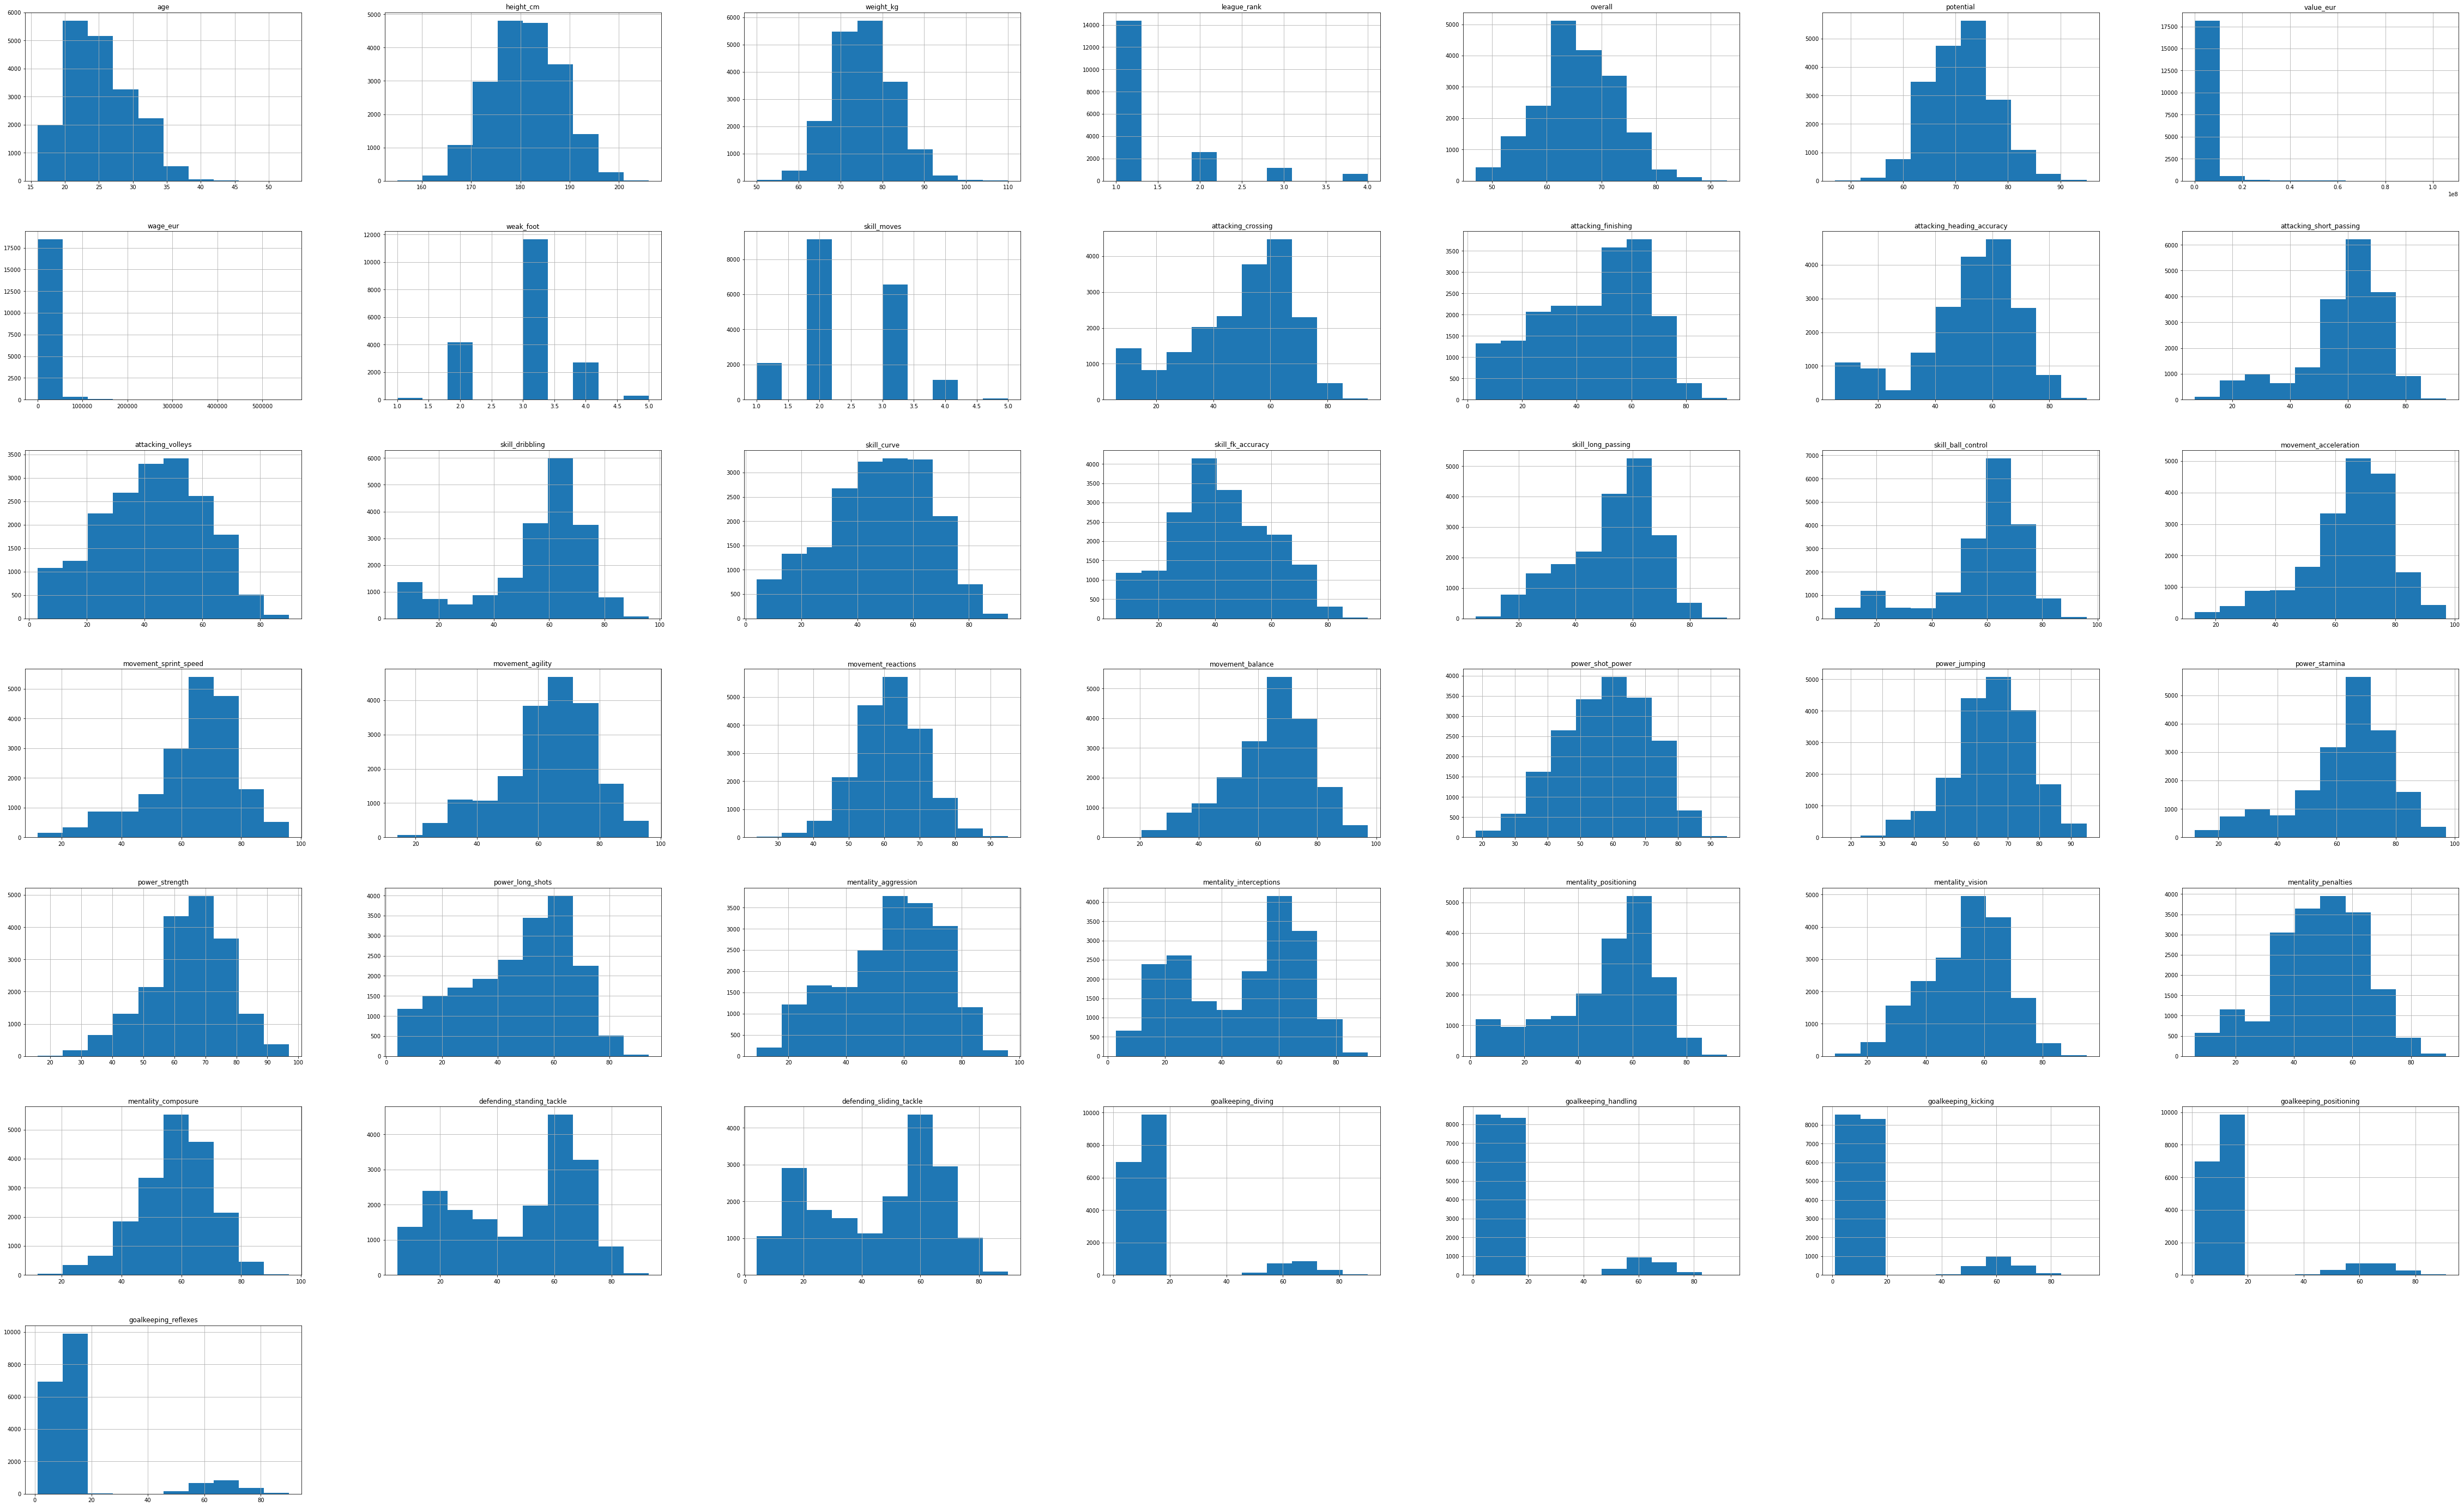

In [14]:
data.hist(figsize=(80,50))

Poniżej wygenerowałyśmy również histogramy dla atrybutów opisowych:

<AxesSubplot:>

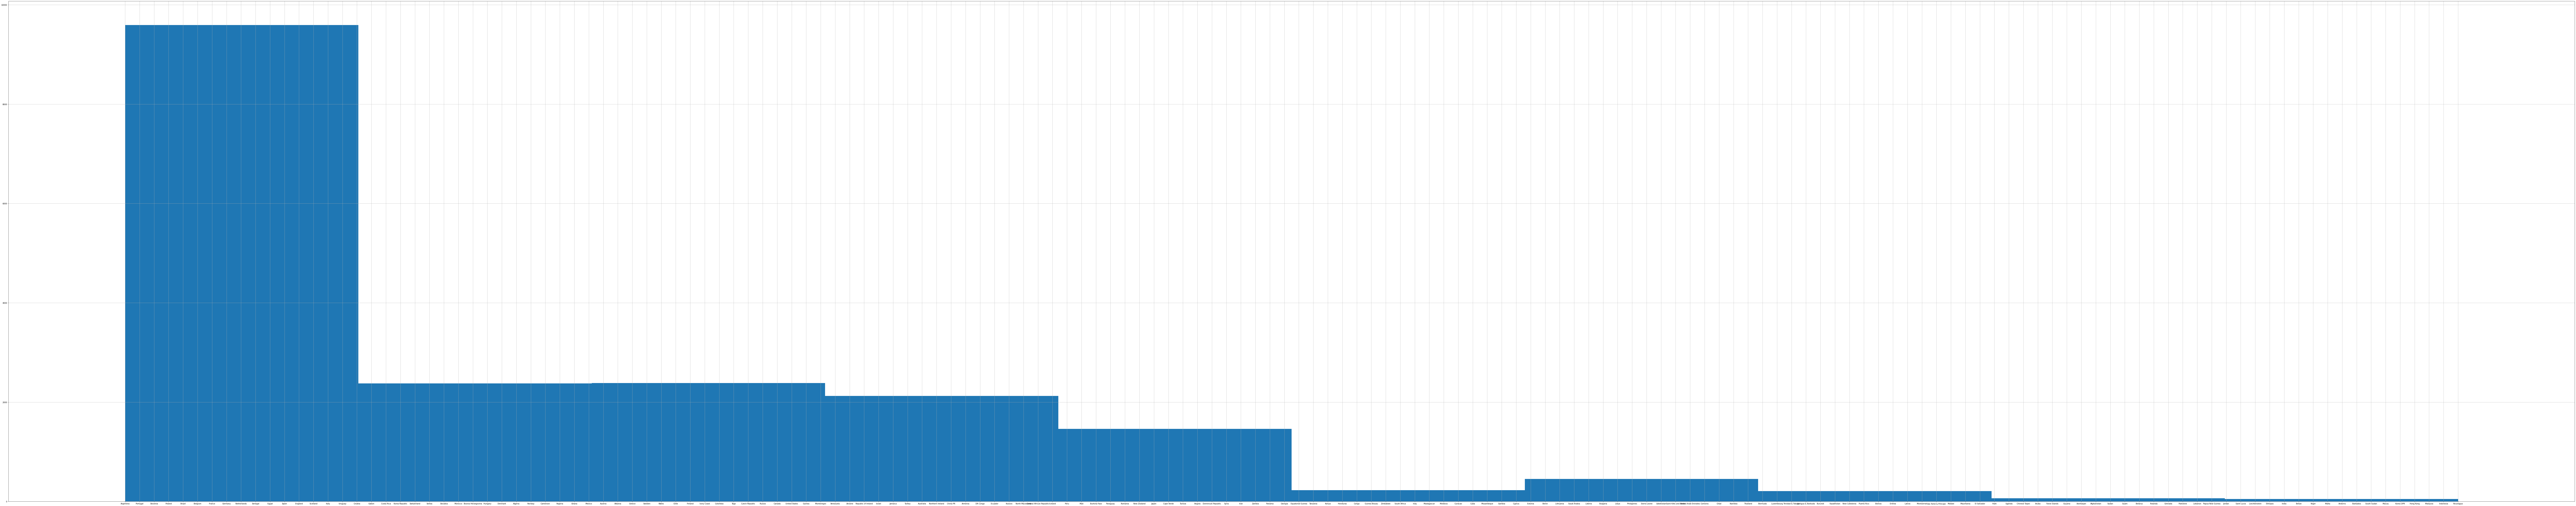

In [15]:
data['nationality'].hist(figsize=(250,50))

In [16]:
data['club_name'].hist(figsize=(850,100))

<AxesSubplot:>

In [17]:
data['league_name'].hist(figsize=(850,100))

<AxesSubplot:>

In [18]:
data['player_positions'].hist(figsize=(650,100))  

<AxesSubplot:>

<AxesSubplot:>

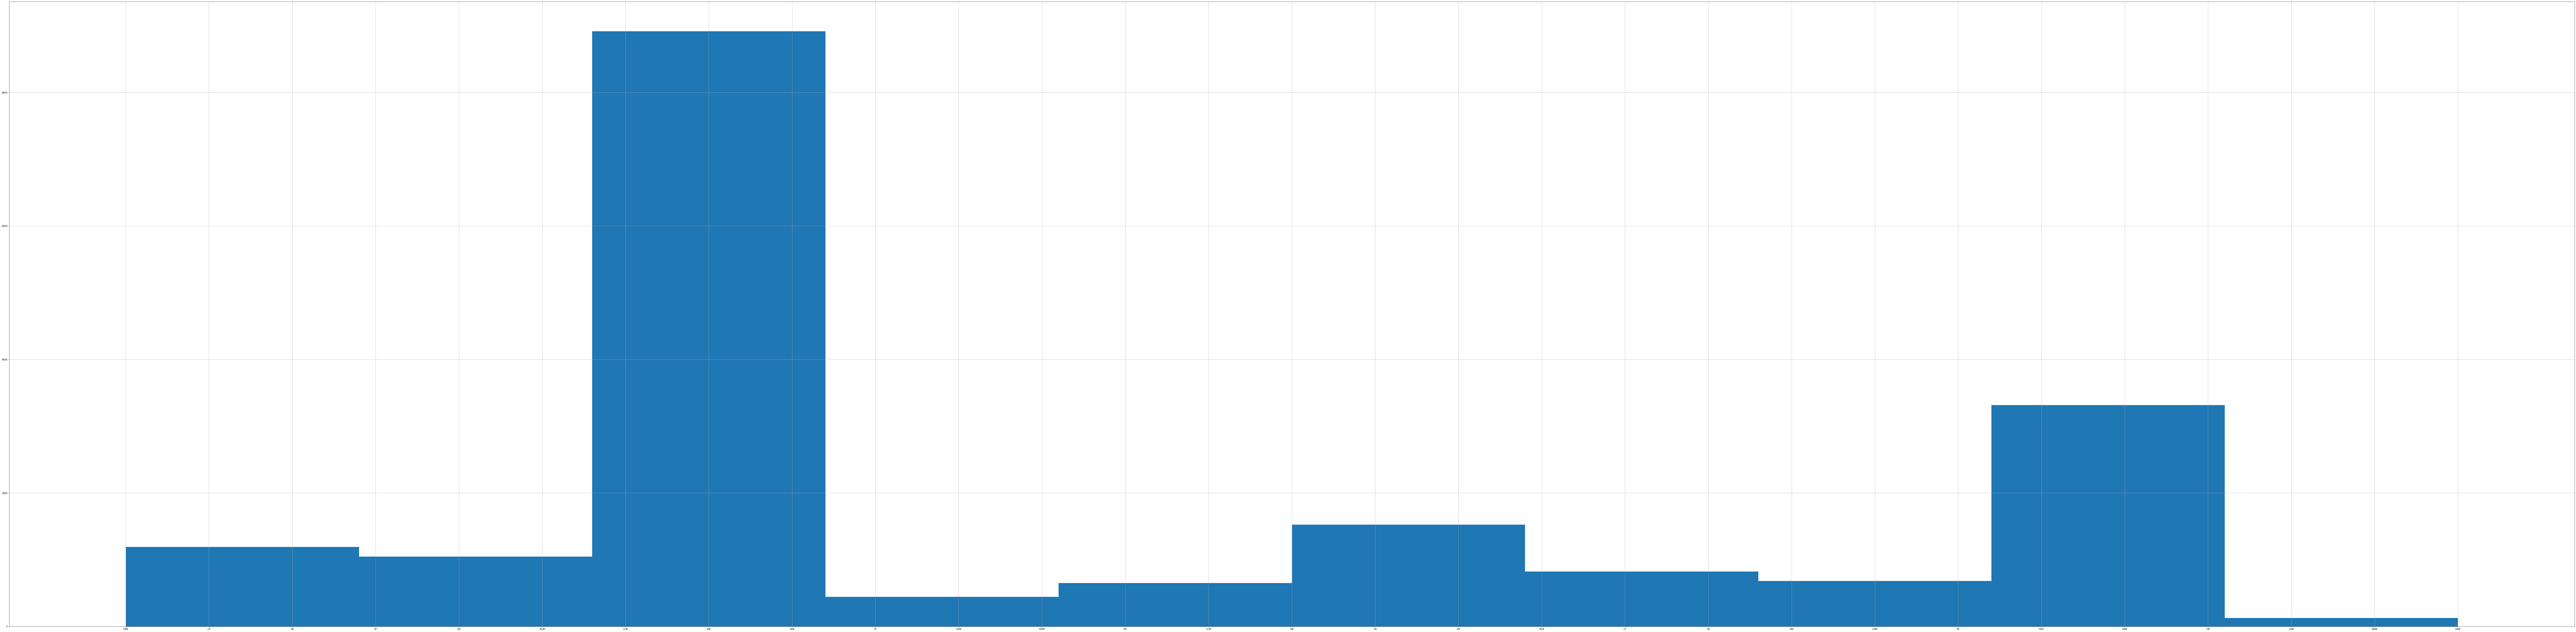

In [19]:
data['team_position'].hist(figsize=(200,50))  

**Wnioski:**

Analizując powstałe histogramy widzimy, że dla wszystkich atrybutów (pomijając atrybutu dotyczące goalkeeping - i jednego atrubutu skill_moves ) największa ilość słupków (najwięcej lub najwyższe słupki) znajdują się w prawej części wykresu - czyli największa ilość piłkarzy ma zdolności fizyczne powyżej środkowej wartości zakresu.

Dla wszystkich atrybutów dotyczących goalkeeping prawie wszyscy zawodnicy znajdują się po lewej stronie wykresu, nielicze wartości są po jego prawej stronie. Może to być związane ze specyfiką tych umiejętności (piłkarze nie-bramkarze nie muszą doskonalić tych umiejętności).

Analizując histogramy atrybutów opisowych widzimy, że jest pewna grupa narodowości (dokałdnie 17 państw w tym Polska) z których pochodzi zdecydowana większość piłkarzy z naszego zbioru.

W przypadku zbioru pozycji na której mogą grać dani zaowdnicy to mamy tutaj również pewne szczególnie wyróżniające się zestawienia.

W przypadku klubów piłkarskich widzimy, że dane są dość równomiernie rozłożone. Z każdego klubu jest w naszym zbiorze mniej więcej podobna liczba piłkarzy.

Jeśli chodzi o pozycje na jakich obecnie grają zawodnicy to 3 pozycje zdecydowanie wyróżniają się na tle innych i występują najczęściej - są to LCB(Left center-back), RW(Right winger) i SUB.

Histogram value_eur i wage_eur dobrze obrazuje, że zdecydowana większość piłkarzy posiada/zarabia mniejsze kwoty podczas gdy istnieje nieliczba grupa piłkarzy których zarobki/wartość jest o wiele wyższa i znacznie wyróżnia się na tle innych.

**Wykresy pudełkowe**

Wykresy pudełkowe rysujemy w kilku grupach, ponieważ atrybuty różnią się zakresem danych i na jednym wykresie te o małych wartościach stałyby się nieczytelne.

In [20]:
sns.set(rc = {'figure.figsize':(180,50)})

<AxesSubplot:>

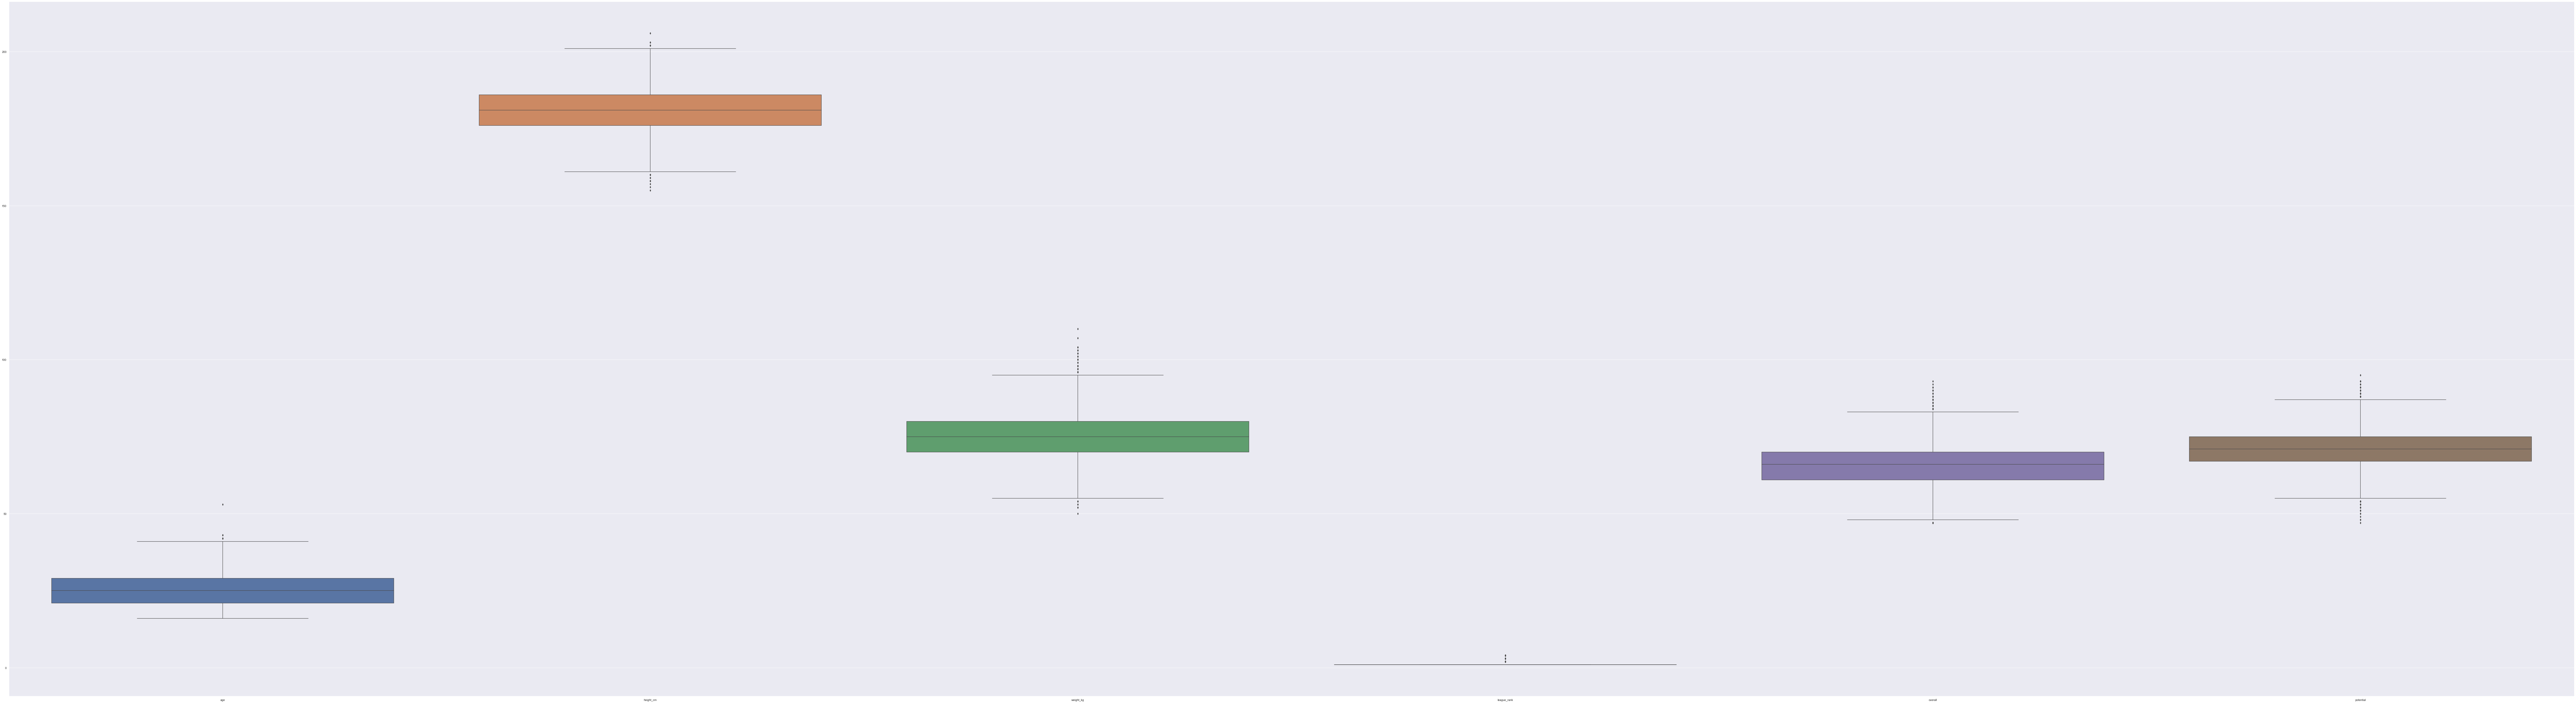

In [21]:
data_temporary = data.iloc[:, 0:9]
sns.boxplot(data=data_temporary)

<AxesSubplot:>

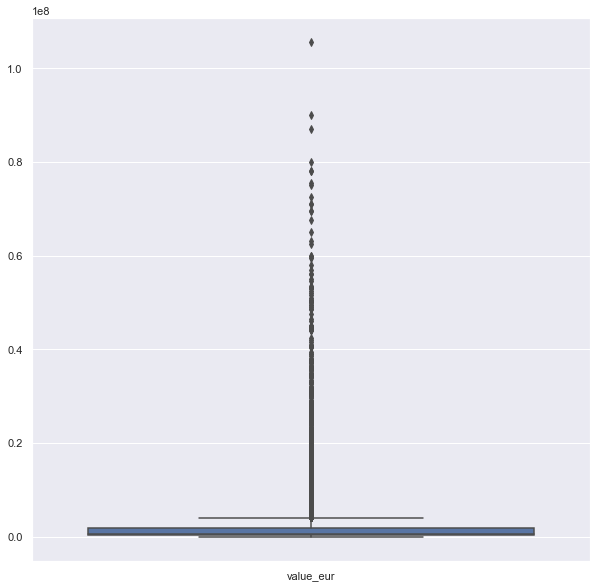

In [22]:
data_temporary = data.iloc[:, 9:10]
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(data=data_temporary)

<AxesSubplot:>

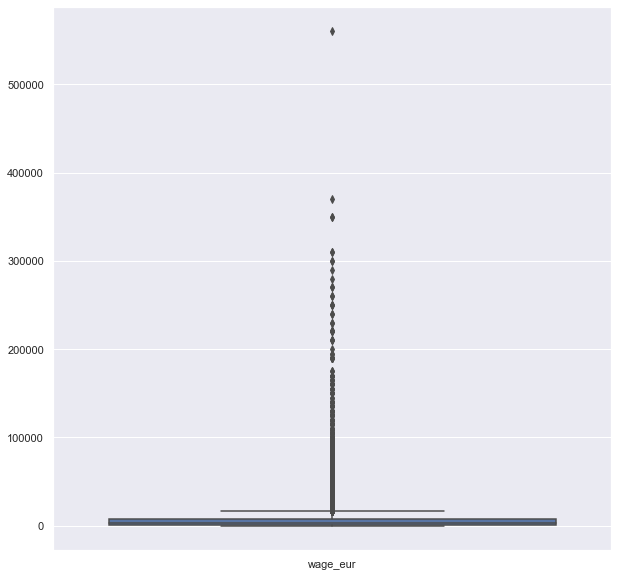

In [23]:
data_temporary = data.iloc[:, 10:11]
sns.boxplot(data=data_temporary)

<AxesSubplot:>

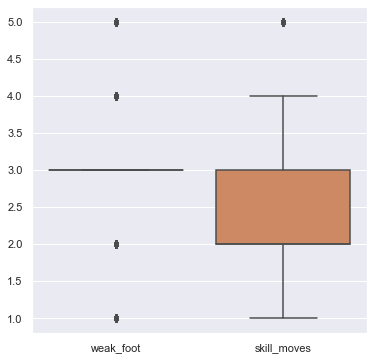

In [24]:
data_temporary = data.iloc[:, 12:14]
sns.set(rc = {'figure.figsize':(6,6)})
sns.boxplot(data=data_temporary)

<AxesSubplot:>

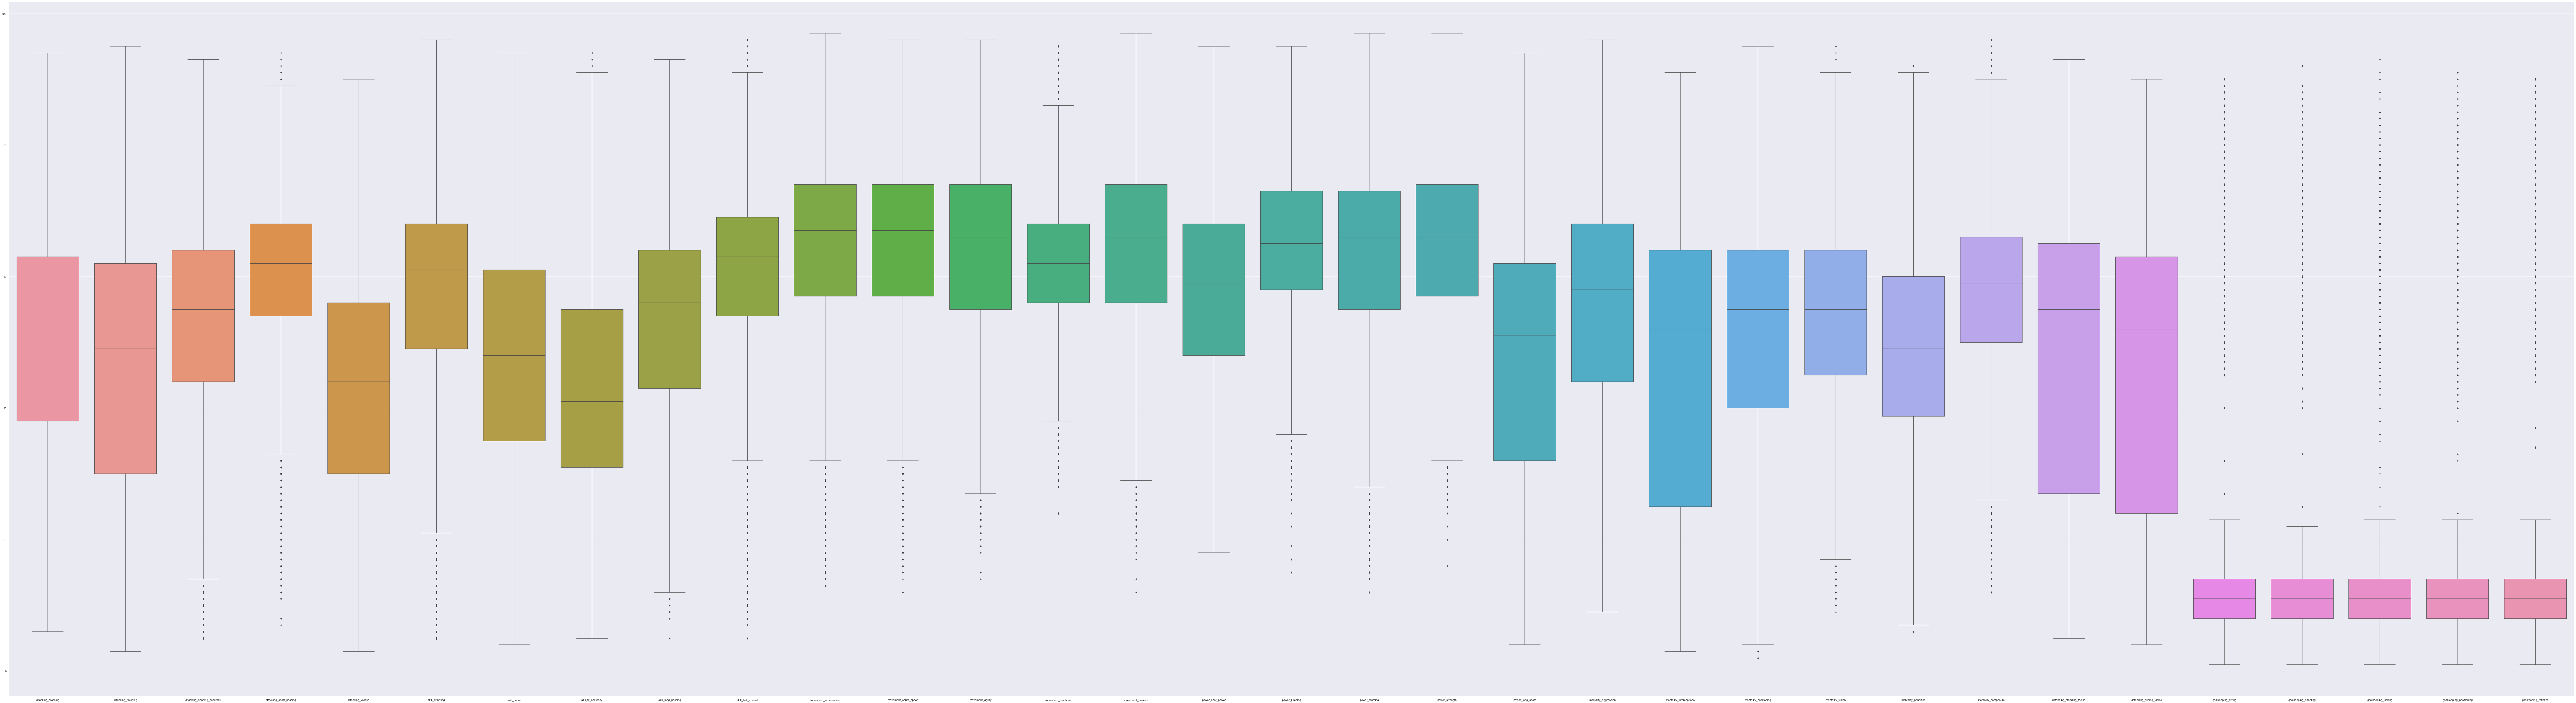

In [25]:
sns.set(rc = {'figure.figsize':(180,50)})
data_temporary = data.iloc[:, 15:]
sns.boxplot(data=data_temporary)

**Wnioski:**

Widzimy na wykresach value_eur i wage_eur, że zdecydowana większość piłkarzy zarabia/posiada zbliżoną do siebie stawkę w niższych wartościach, ale istneieje mała grupa piłkarzy, których wartość/zarobki znacznie przewyższają wartość/zarobki innych. Najbardziej ciekawą informacje niesie najwyżej umiejscowiana kropka - która pokazuje że pewien piłkarz zarabia/posiada najwyższą pensje/wartość która zecydowanie odbiega od innych.

Jeśli chodzi o atrybutu dotyczące zdolności fizycznych - to ich zakresy są do siebie dość zbliżone. Widzimy też, że dla pewnych atrybutów poniżej wartości minimalnej mamy jeszcze kilka punktów, co świadczy o tym, że istnieją piłkarze, którzy mają ocenioną tę zdolność na bardzo niskim poziomie. Mamy też kilku piłkarzy powyżej maksymalnej wartości dla pewnych atrybutów, ale co ciekawe jest ich mniej niż tych wspomnianych wcześniej poniżej min.

Dla atrybutów dotyczących goalkeeping wykres pudełkowy potwierdza nam opisany wcześniej wniosek, że zdecydowana większość piłkarzy oscyluje dookoła niskiej wartości, ale istnieje pewna część piłkarzy których wartość bardzo przewyższa wartość średnią.

**Zależność między posiadanymi danymi - korelacja**

<AxesSubplot:>

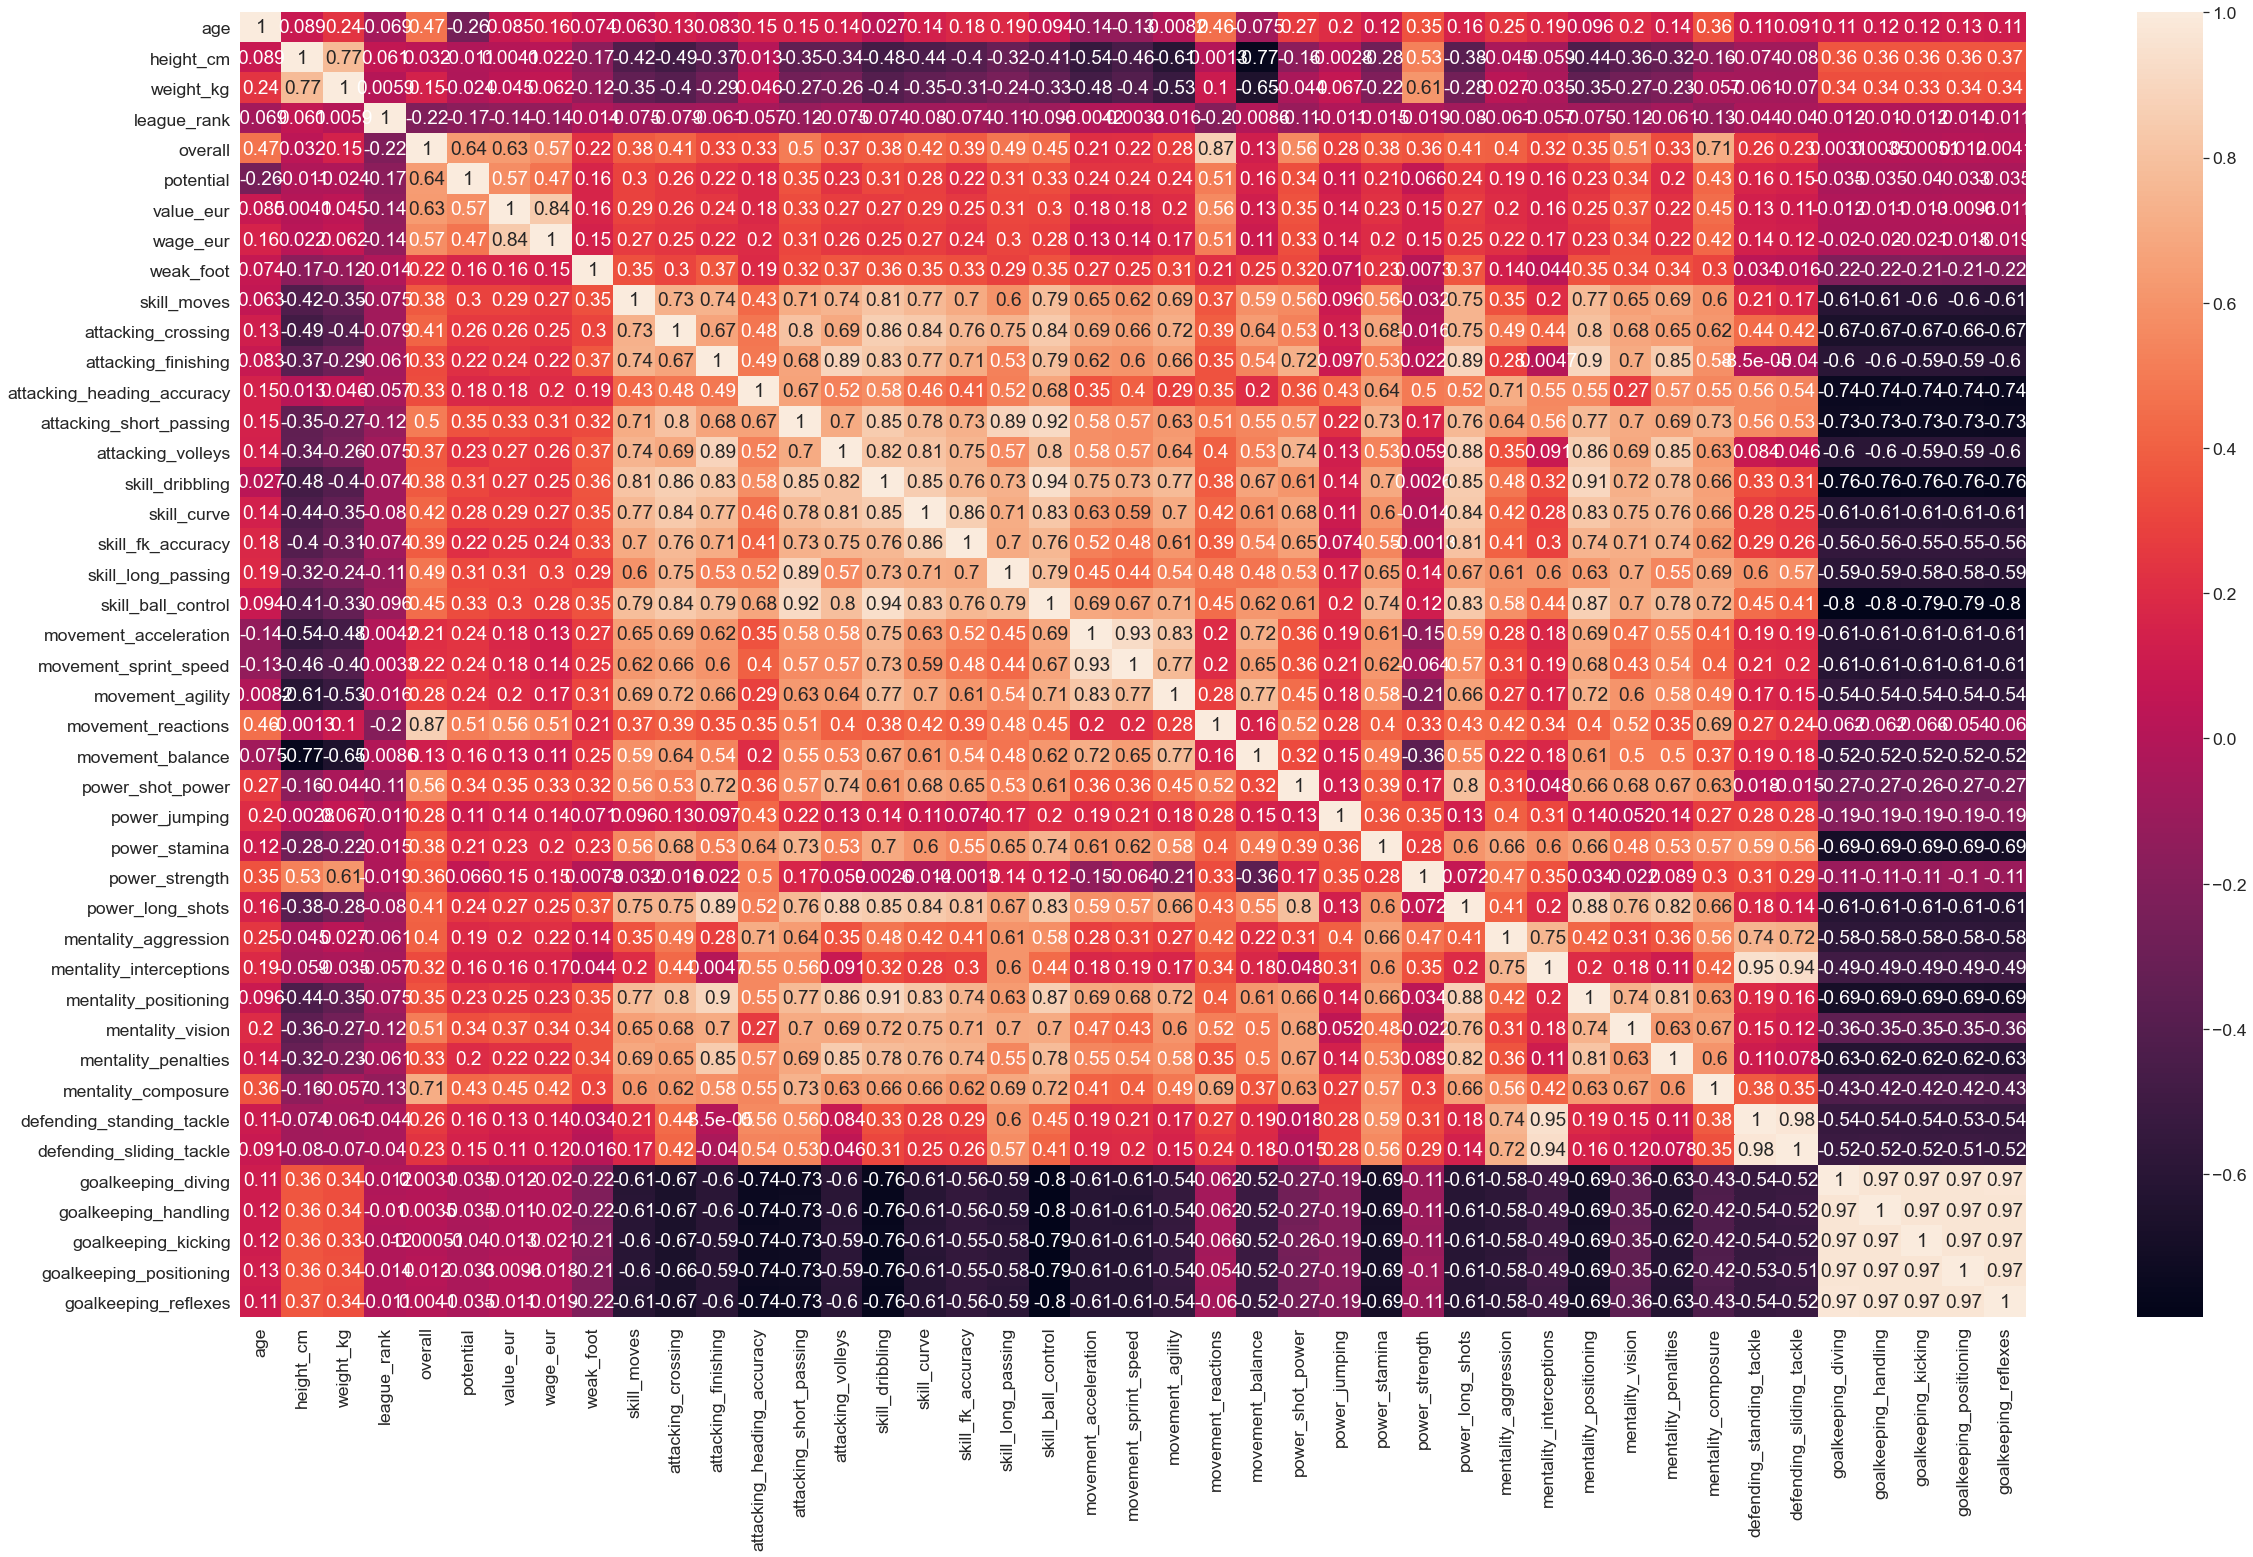

In [26]:
sns.set(rc = {'figure.figsize':(40,24)})
sns.set(font_scale=1.6)
sns.heatmap(data.corr(),annot = data.corr())

Wybieramy pary atrybutów o największej bezwzlędnej wartości korelacji:

In [27]:
corr_matrix = data.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol[:40]

<ipython-input-27-32c852cb83d9>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


defending_standing_tackle  defending_sliding_tackle     0.975893
goalkeeping_diving         goalkeeping_reflexes         0.973679
goalkeeping_handling       goalkeeping_reflexes         0.970859
goalkeeping_diving         goalkeeping_handling         0.970826
goalkeeping_positioning    goalkeeping_reflexes         0.970721
goalkeeping_diving         goalkeeping_positioning      0.970585
goalkeeping_handling       goalkeeping_positioning      0.969855
goalkeeping_kicking        goalkeeping_reflexes         0.967399
goalkeeping_diving         goalkeeping_kicking          0.967107
goalkeeping_handling       goalkeeping_kicking          0.966943
goalkeeping_kicking        goalkeeping_positioning      0.966259
mentality_interceptions    defending_standing_tackle    0.947584
skill_dribbling            skill_ball_control           0.939610
mentality_interceptions    defending_sliding_tackle     0.935894
movement_acceleration      movement_sprint_speed        0.925610
attacking_short_passing  

**Wnioski**
- najbardziej korelują ze sobą umiejętności związane z bramkarstwem (zaczynające się od goalkeeping)
- dobrze korelują też ze sobą umiejętności techniczne (zdecydowanie bardziej niż fizyczne i mentalne)

**Postawienie tezy**

Na podstawie dokonanej analizy i wysnutych wniosków postawiłyśmy tezę.

# **TEZA:**

**Wartość rynkowa piłkarza w dużym stopniu zależy od jego zdolności fizycznych (moc uderzenia, kontrola piłki, utrzymanie piłki, umiejetność uników, podań, trafień, dryblowania, celność goli, szybkość, siła strzałów, siła kopania, siła skoków, pozycjonowanie, refleks, wytrzymałość, zdolność obrony na bramce).**

In [28]:
print(data.columns.values)

['age' 'height_cm' 'weight_kg' 'nationality' 'club_name' 'league_name'
 'league_rank' 'overall' 'potential' 'value_eur' 'wage_eur'
 'player_positions' 'weak_foot' 'skill_moves' 'team_position'
 'attacking_crossing' 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'power_long_shots' 'mentality_aggression' 'mentality_interceptions'
 'mentality_positioning' 'mentality_vision' 'mentality_penalties'
 'mentality_composure' 'defending_standing_tackle'
 'defending_sliding_tackle' 'goalkeeping_diving' 'goalkeeping_handling'
 'goalkeeping_kicking' 'goalkeeping_positioning' 'goalkeeping_reflexes']


In [29]:
data.drop(['age' ,'height_cm' ,'weight_kg', 'nationality', 'club_name' ,'league_name',
 'league_rank'  ,'wage_eur',
 'player_positions', 'weak_foot',  'team_position'], axis=1, inplace=True)

Usuwamy cechy wysoko ze sobą skorelowane (koleacje powyżej 90%):

In [30]:
data.drop(['defending_standing_tackle', 'mentality_interceptions','mentality_positioning', 'goalkeeping_diving',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes','skill_ball_control','movement_acceleration'], axis=1, inplace=True)

In [31]:
all_features = data.columns.values
i = np.where(all_features == 'value_eur')
all_features = np.delete(all_features, i[0][0])
all_features

array(['overall', 'potential', 'skill_moves', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_sliding_tackle',
       'goalkeeping_handling'], dtype=object)

Tworzymy nowe cechy:

In [32]:
# potencjał - cecha która przewiduje rozwój piłkarza i jego możliwości polepszenia się
# jest to bardzo ważna cecha dotycząca wartości rynkowej, bo jeśli piłkarz jest bardzo dobry teraz,
# ale nie ma w perspektywie lepszych wyników to sponsorzy nie będą w niego inwestować
# zainwestują w piłkarza który dobrze rokuje, ponieważ na takiej inwestycji będą mogli zyskać

# potencjał
data['potential_squared'] = data['potential'].apply(lambda x: x**2)

# jedną z najważniejszych cech w piłce nożnej jest oczywiście umiejętność strzelania goli, 
# dlatego tworzymy kwadrat cechy mówiącej o umiejętności strzelnia goli,
#by zwiększyć separację między niską a wysoką wartością tej cechy

# gole
data['attacking_finishing_squared'] = data['attacking_finishing'].apply(lambda x: x**2)

# drugą ważną cechą jest umiejętność dośrodkowań, dlatego podobnie jak w przypadku goli chcemy wyróżnić
# piłkarzy, którzy potrafią bardzo dobrze dośrodkowywać

# dośrodkowanie
data['attacking_crossing_squared'] = data['attacking_crossing'].apply(lambda x: x**2)

# tworzymy ceche mówiącą o zdolności podań- zależy nam żeby piłkarz potrafił wykonywać bliskie jak i dalekie podania
# bo podczas meczu będzie musiał wykonywać obydwa rodzaje podań

# podania
data['passing_atribute']  = data['skill_long_passing']*data['attacking_short_passing']

# wyróżniamy piłkarzy-bramkarzy, którzy posiadają atrybut "celności obronionych bramek" na bardzo wysokim poziomie

#obrona na bramce
data['goalkeeping_atribute']  = data['goalkeeping_handling'].apply(lambda x: x**2)


Sprawdzenie czy mamy jakieś braki w danych:

In [33]:
print('Ilość wartości brakujących: ', data.isnull().sum().sum())

Ilość wartości brakujących:  0


In [34]:
y = data['value_eur']
X = data.drop(['value_eur'], axis=1)

In [35]:
X.columns.values

array(['overall', 'potential', 'skill_moves', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_sliding_tackle',
       'goalkeeping_handling', 'potential_squared',
       'attacking_finishing_squared', 'attacking_crossing_squared',
       'passing_atribute', 'goalkeeping_atribute'], dtype=object)

Podział danych na zbiór uczący i testowy

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Regresja dla wszystkich cech

Train score: 0.4546219280975048, test_score: 0.4775832046432017


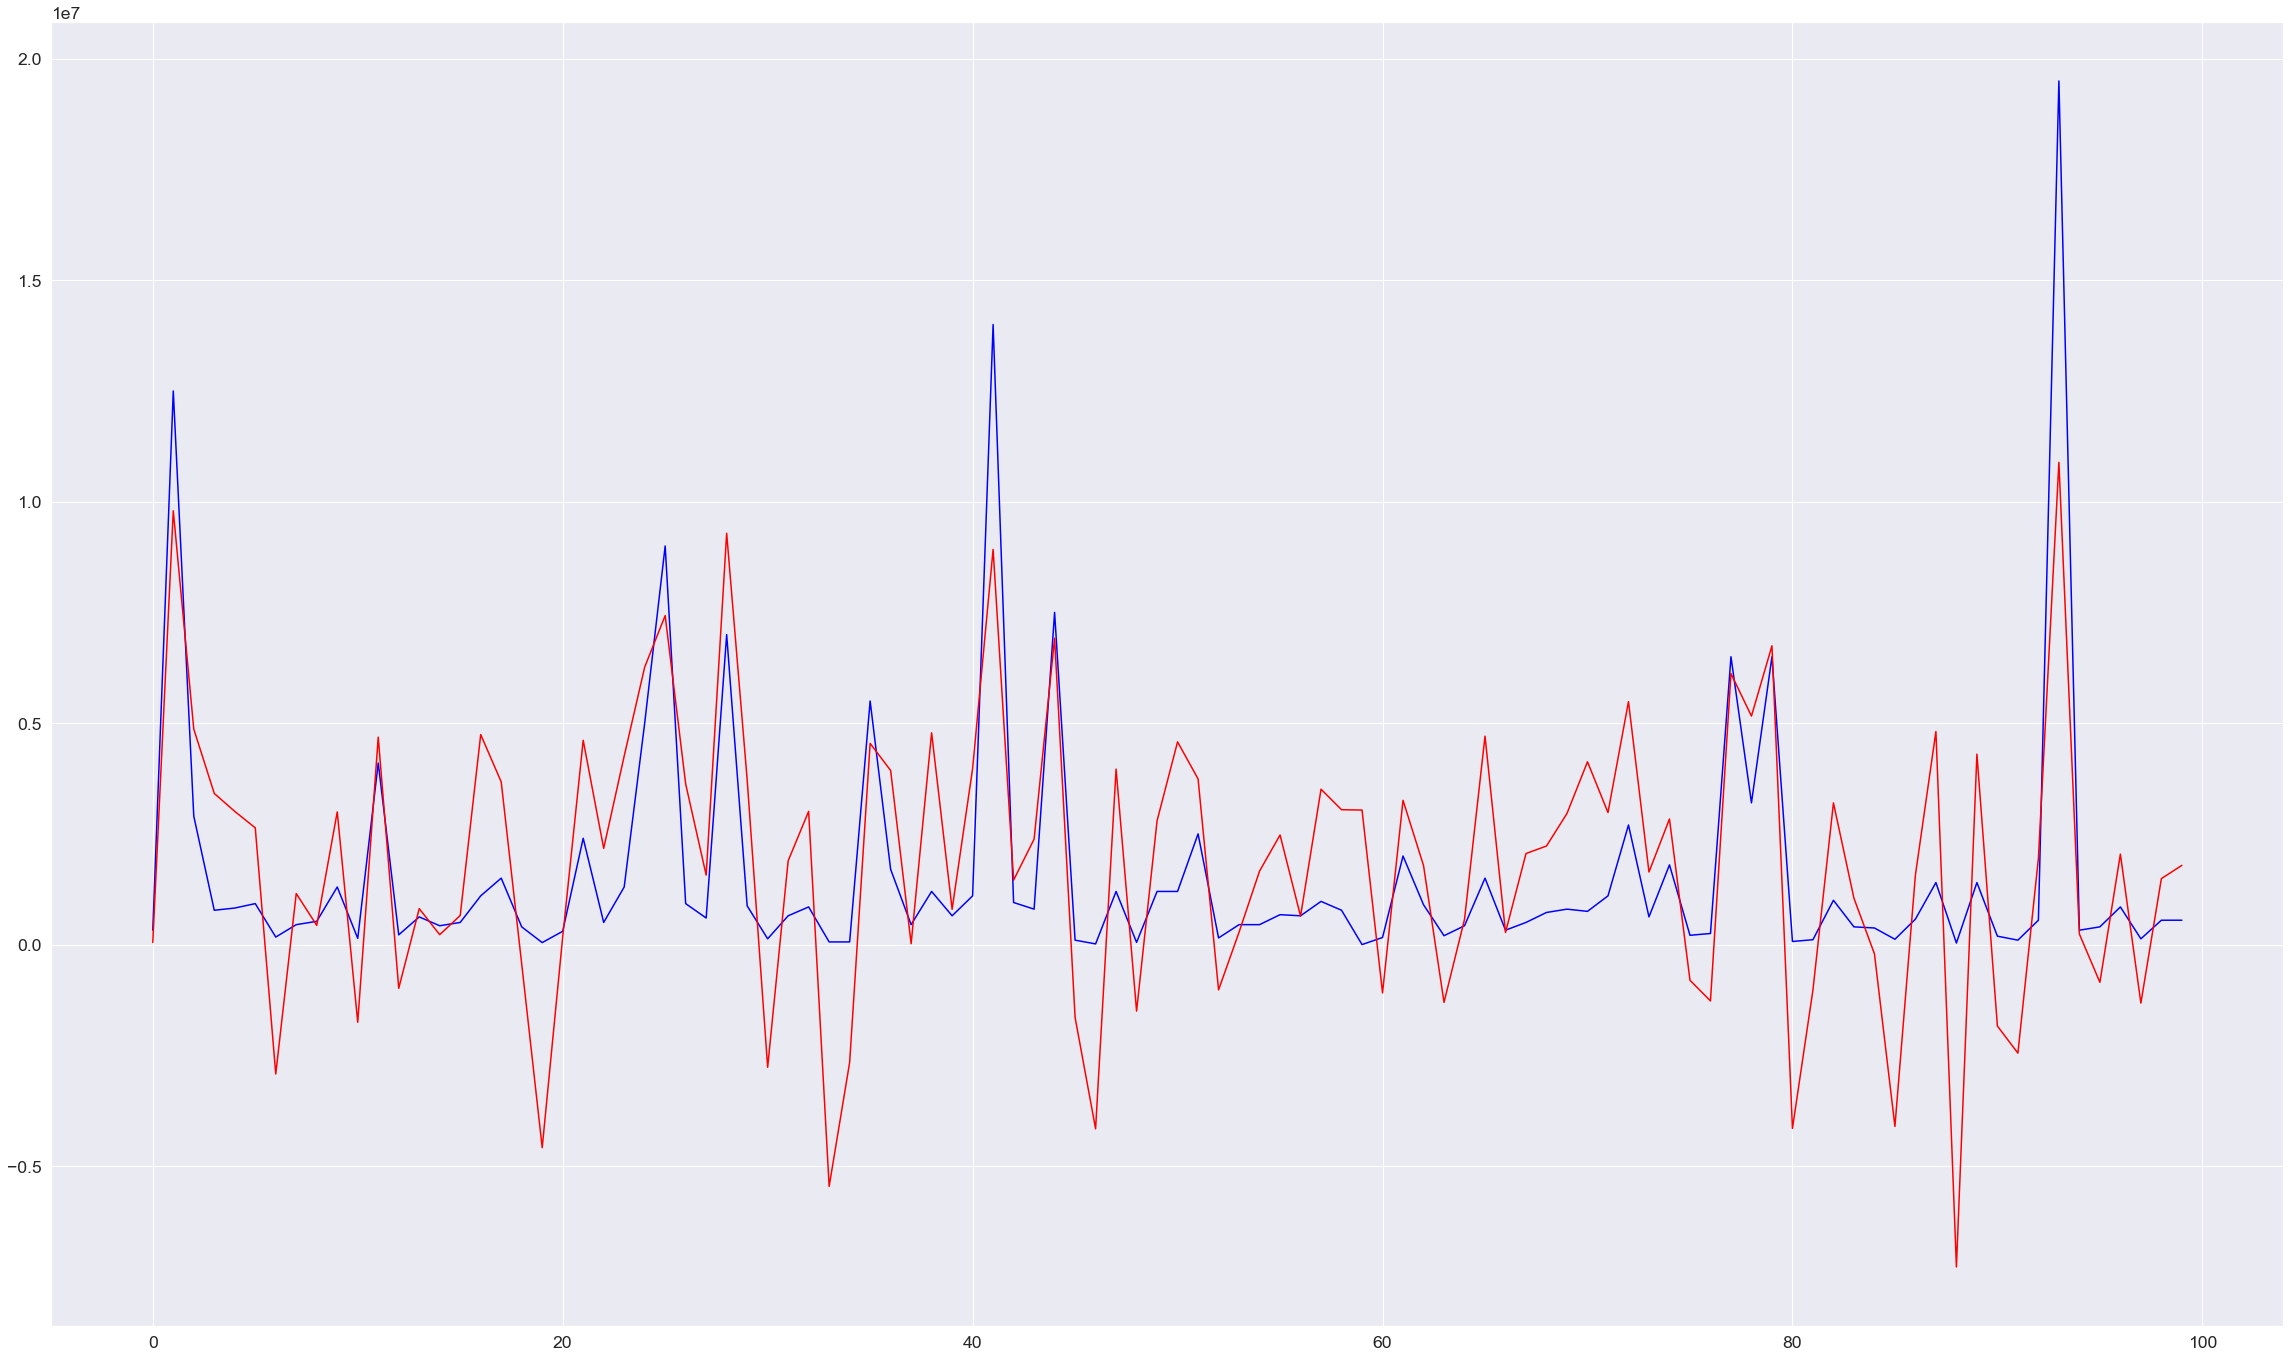

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True).fit(X_train[all_features], y_train)
y_pred_step = reg.predict(X_test[all_features])
train_score = reg.score(X_train[all_features], y_train)
test_score = reg.score(X_test[all_features], y_test)
print(f"Train score: {train_score}, test_score: {test_score}")
n=100
plt.plot(range(n), y_test[0:n], c='blue')
plt.plot(range(n), y_pred_step[0:n], c='red')

### Regresja dla wszystkich cech + dodanych przez nas

Train score: 0.6846327606772111, test_score: 0.7030370822998129


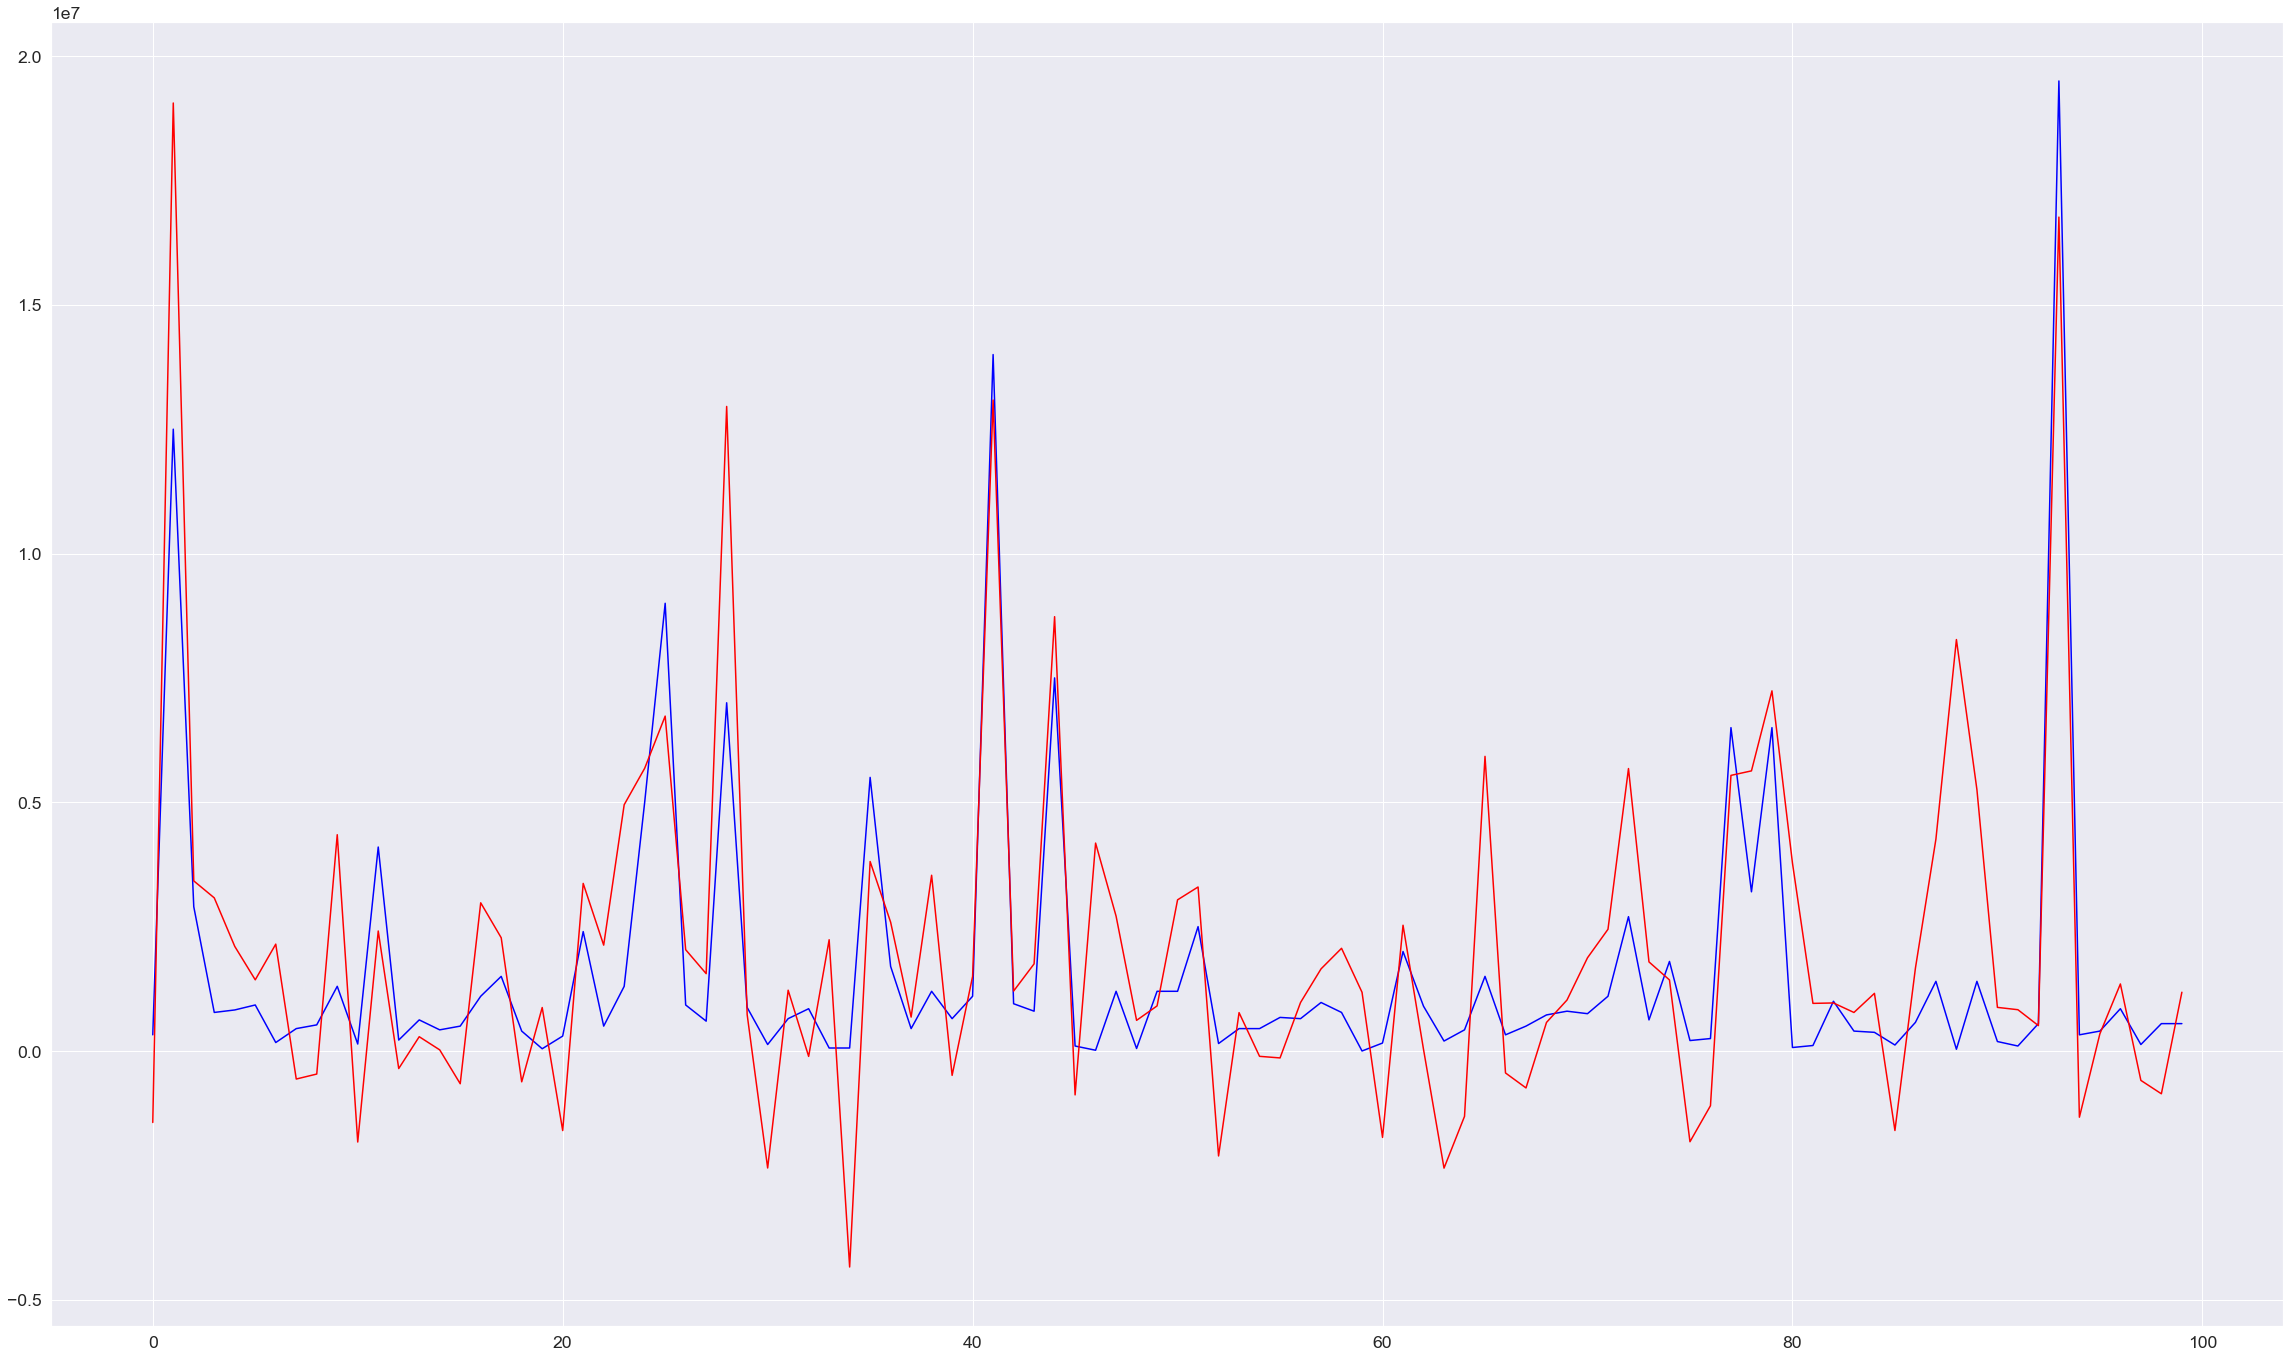

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True).fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print(f"Train score: {train_score}, test_score: {test_score}")
n=100
plt.plot(range(n), y_test[0:n], c='blue')
plt.plot(range(n), y_pred_reg[0:n], c='red')

### Regresja dla 10 cech wybranych metodą regresji krokowej w tył

Wybór cech za pomocą regresji krokowej w tył

In [39]:
from sklearn.model_selection import cross_val_score

def backward_stepwise_reg(X_train, y_train, n):
    rl = LinearRegression()
    cechyRL = list(X_train.columns.values)

    while len(cechyRL) > n:
        to_del = cechyRL[0]
        max_err = 1e25
        for cecha in cechyRL:
            sel = cechyRL.copy()
            sel.remove(cecha)
            rl.fit(X_train[sel], y_train)
            score = cross_val_score(rl, X_train[sel], y_train, scoring='neg_mean_absolute_error', cv=5)
            err = -sum(score)/len(score)
            if err < max_err:
                max_err = err;
                to_del = cecha
        cechyRL.remove(to_del)
    return cechyRL
features_reg = backward_stepwise_reg(X_train, y_train, 10)
features_reg

['overall',
 'potential',
 'attacking_crossing',
 'attacking_short_passing',
 'skill_long_passing',
 'movement_sprint_speed',
 'potential_squared',
 'attacking_crossing_squared',
 'passing_atribute',
 'goalkeeping_atribute']

Regresja dla wybranych cech

Train score: 0.6699896605101192, test_score: 0.6991988218333024


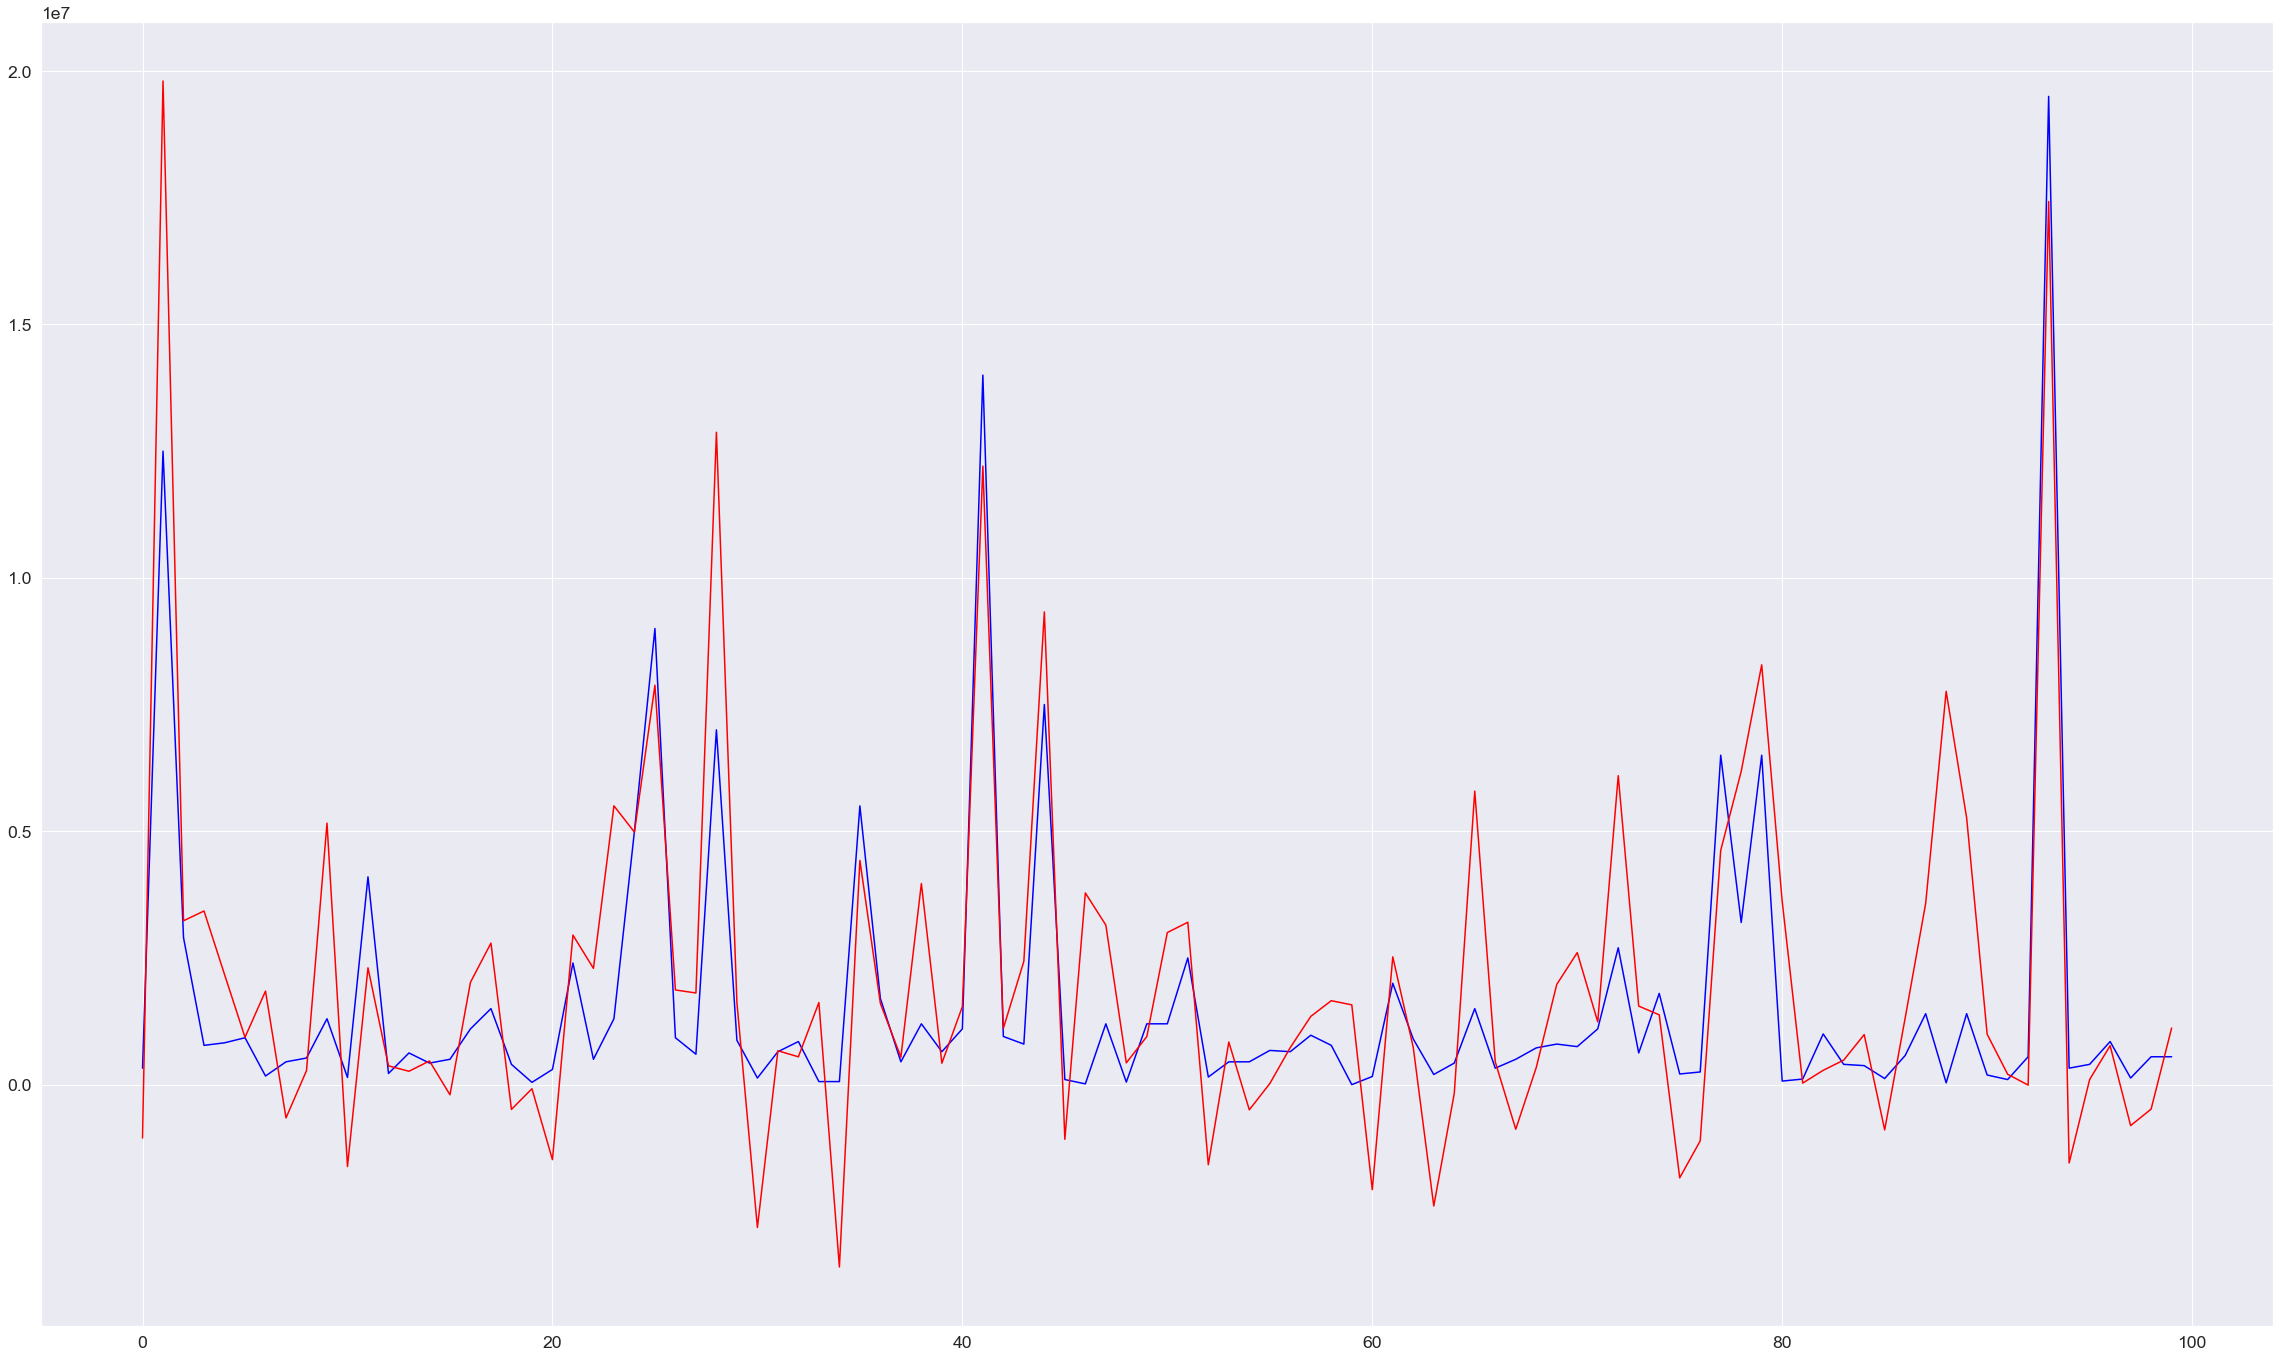

In [40]:
reg = LinearRegression(normalize=True).fit(X_train[features_reg], y_train)
y_pred_step = reg.predict(X_test[features_reg])
train_score = reg.score(X_train[features_reg], y_train)
test_score = reg.score(X_test[features_reg], y_test)
print(f"Train score: {train_score}, test_score: {test_score}")
n=100
plt.plot(range(n), y_test[0:n], c='blue')
plt.plot(range(n), y_pred_step[0:n], c='red')

### Wybór cech i regresja za pomocą metody Lasso

Train score: 0.6835338678407394, test_score: 0.7020592298997165


[(5097140.958092794, 'potential'),
 (214943.54987330566, 'skill_moves'),
 (195192.1873880827, 'overall'),
 (181301.9649371309, 'attacking_finishing'),
 (137769.54805620466, 'skill_long_passing'),
 (111439.6753567159, 'attacking_crossing'),
 (89760.93670441961, 'attacking_short_passing'),
 (73425.58141669302, 'goalkeeping_handling'),
 (37099.69732732024, 'potential_squared'),
 (29923.515034400516, 'movement_sprint_speed'),
 (23804.037573554713, 'movement_reactions'),
 (11213.595561302318, 'attacking_volleys'),
 (9927.297228336643, 'power_long_shots'),
 (9672.84191317663, 'attacking_heading_accuracy'),
 (9303.820156058104, 'movement_balance'),
 (9127.951184906724, 'power_shot_power'),
 (8701.578758698677, 'movement_agility'),
 (6022.275700741676, 'defending_sliding_tackle'),
 (5051.922700205504, 'power_stamina'),
 (4467.184222240517, 'mentality_penalties'),
 (4310.266182425193, 'mentality_composure'),
 (4215.215402387779, 'mentality_aggression'),
 (2581.407565236082, 'passing_atribute'),

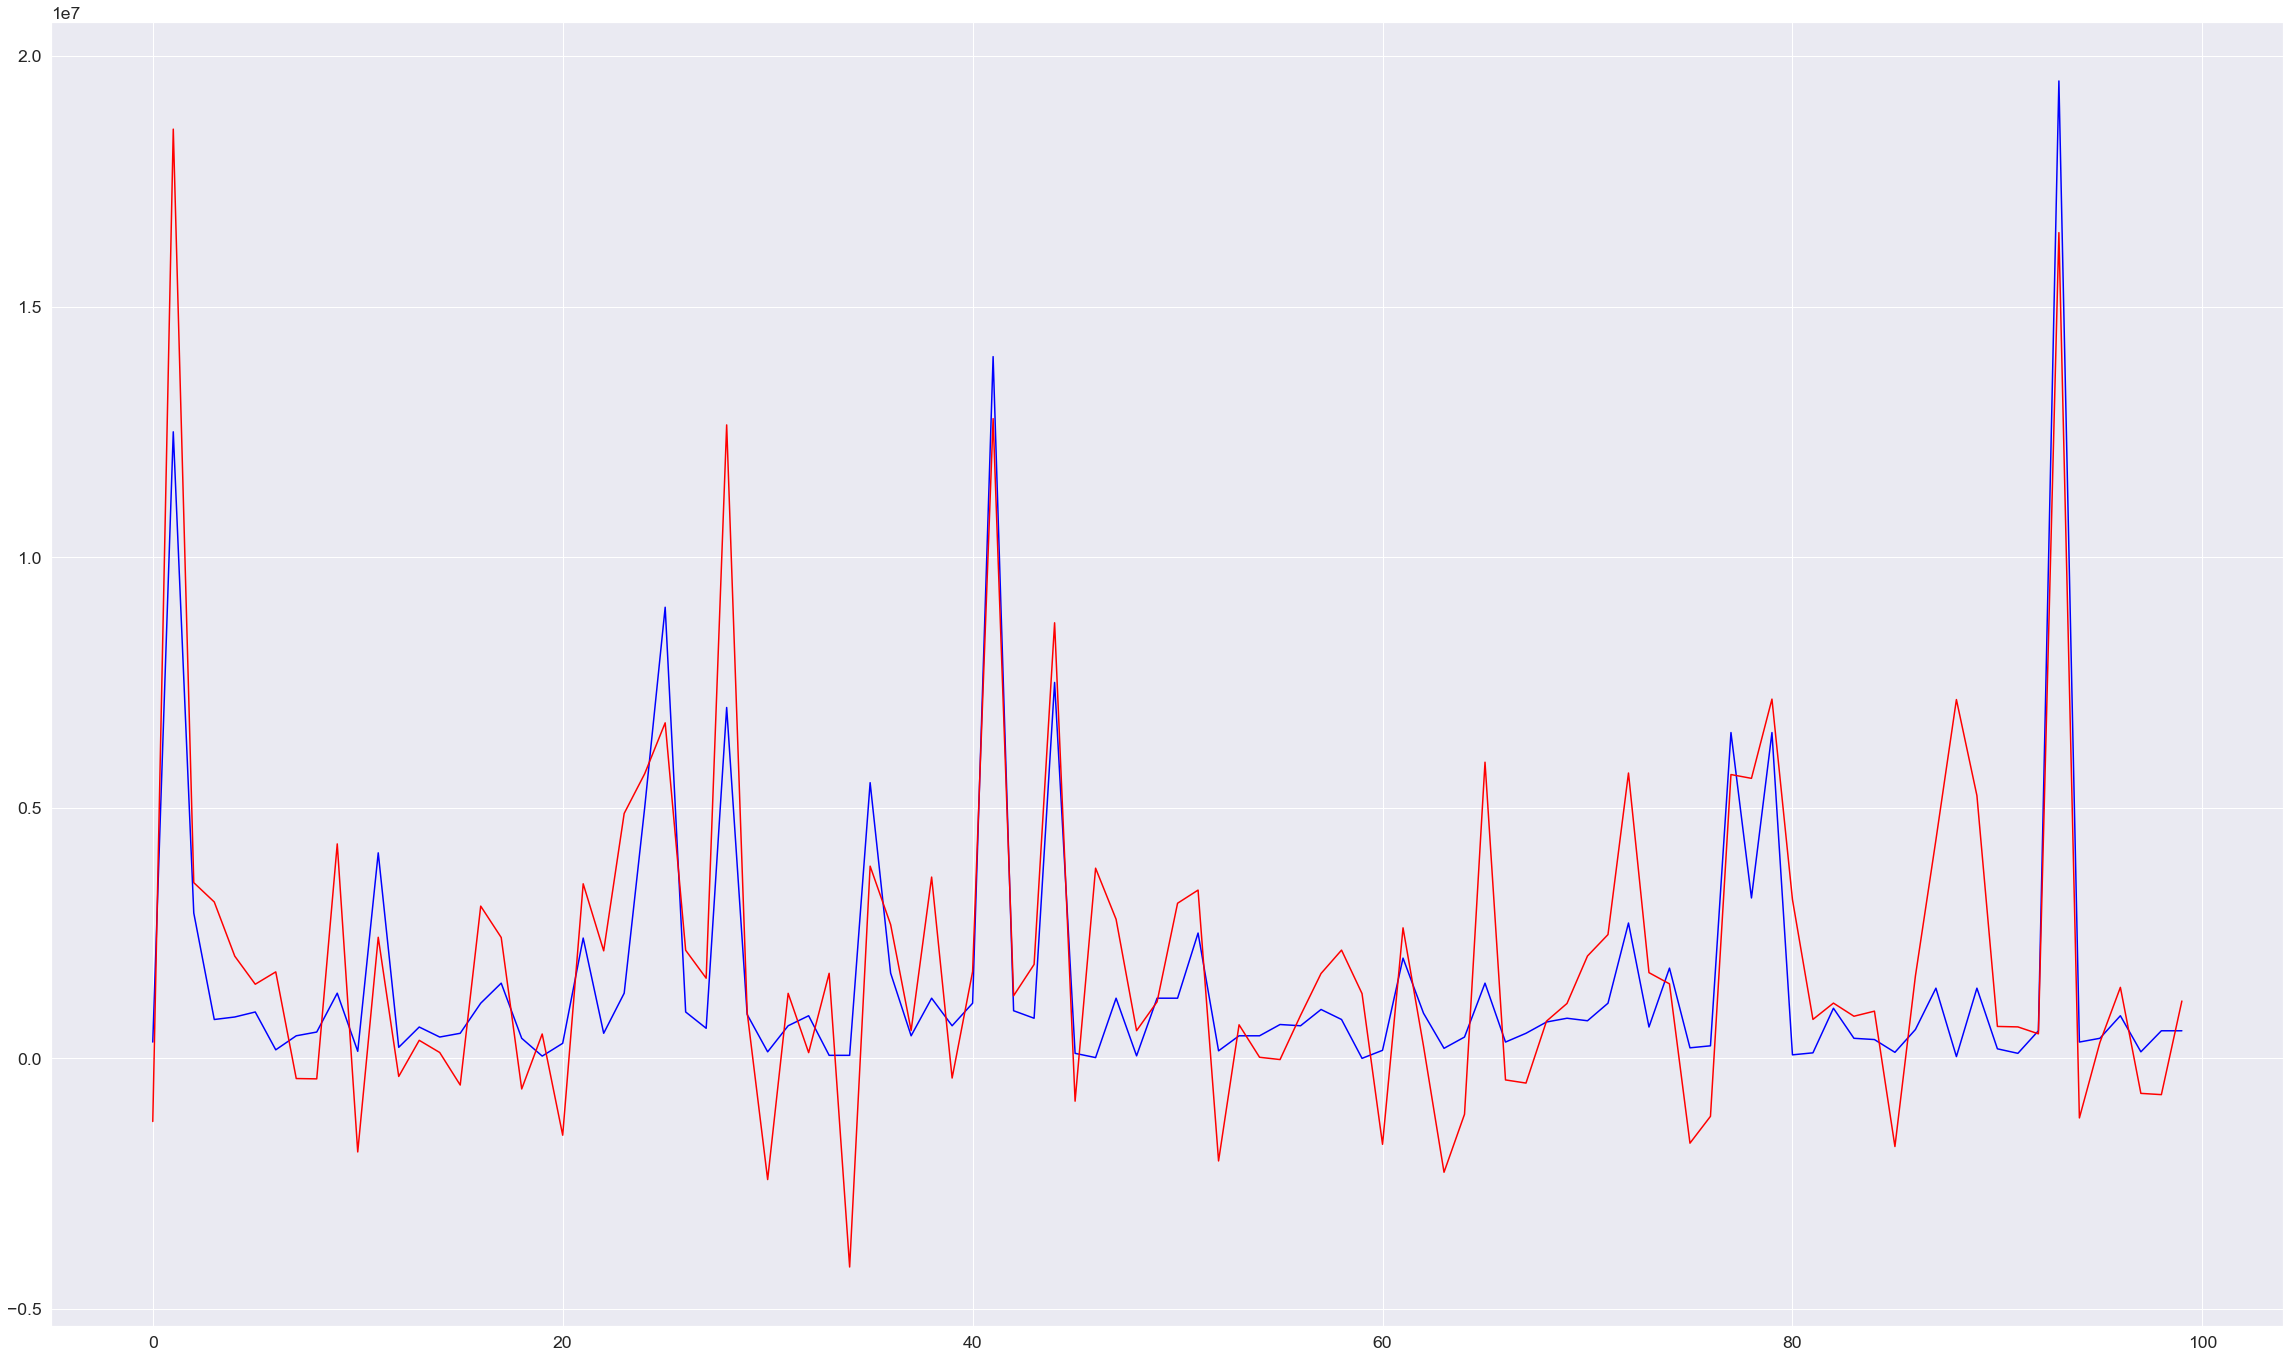

In [41]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, normalize=True).fit(X_train, y_train)
reg.score(X_train, y_train)
reg.coef_
a = sorted(list(zip(abs(reg.coef_), X.columns.values,)), reverse=True)
y_pred_l = reg.predict(X_test)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print(f"Train score: {train_score}, test_score: {test_score}")
n=100
plt.plot(range(n), y_test[0:n], c='blue')
plt.plot(range(n), y_pred_l[0:n], c='red')
a

In [42]:
fuateres_l = ['overall', 'potential', 'skill_moves', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
'attacking_short_passing', 'attacking_volleys','skill_curve', 'skill_long_passing', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_vision', 'mentality_penalties','mentality_composure', 'defending_sliding_tackle','goalkeeping_handling', 'potential_squared',
'attacking_finishing_squared', 'attacking_crossing_squared','passing_atribute', 'goalkeeping_atribute']

### Regresja Ridge dla cech wybranych przez metodę Lasso

Train score: 0.4835773206862699, test_score: 0.5054071316693258


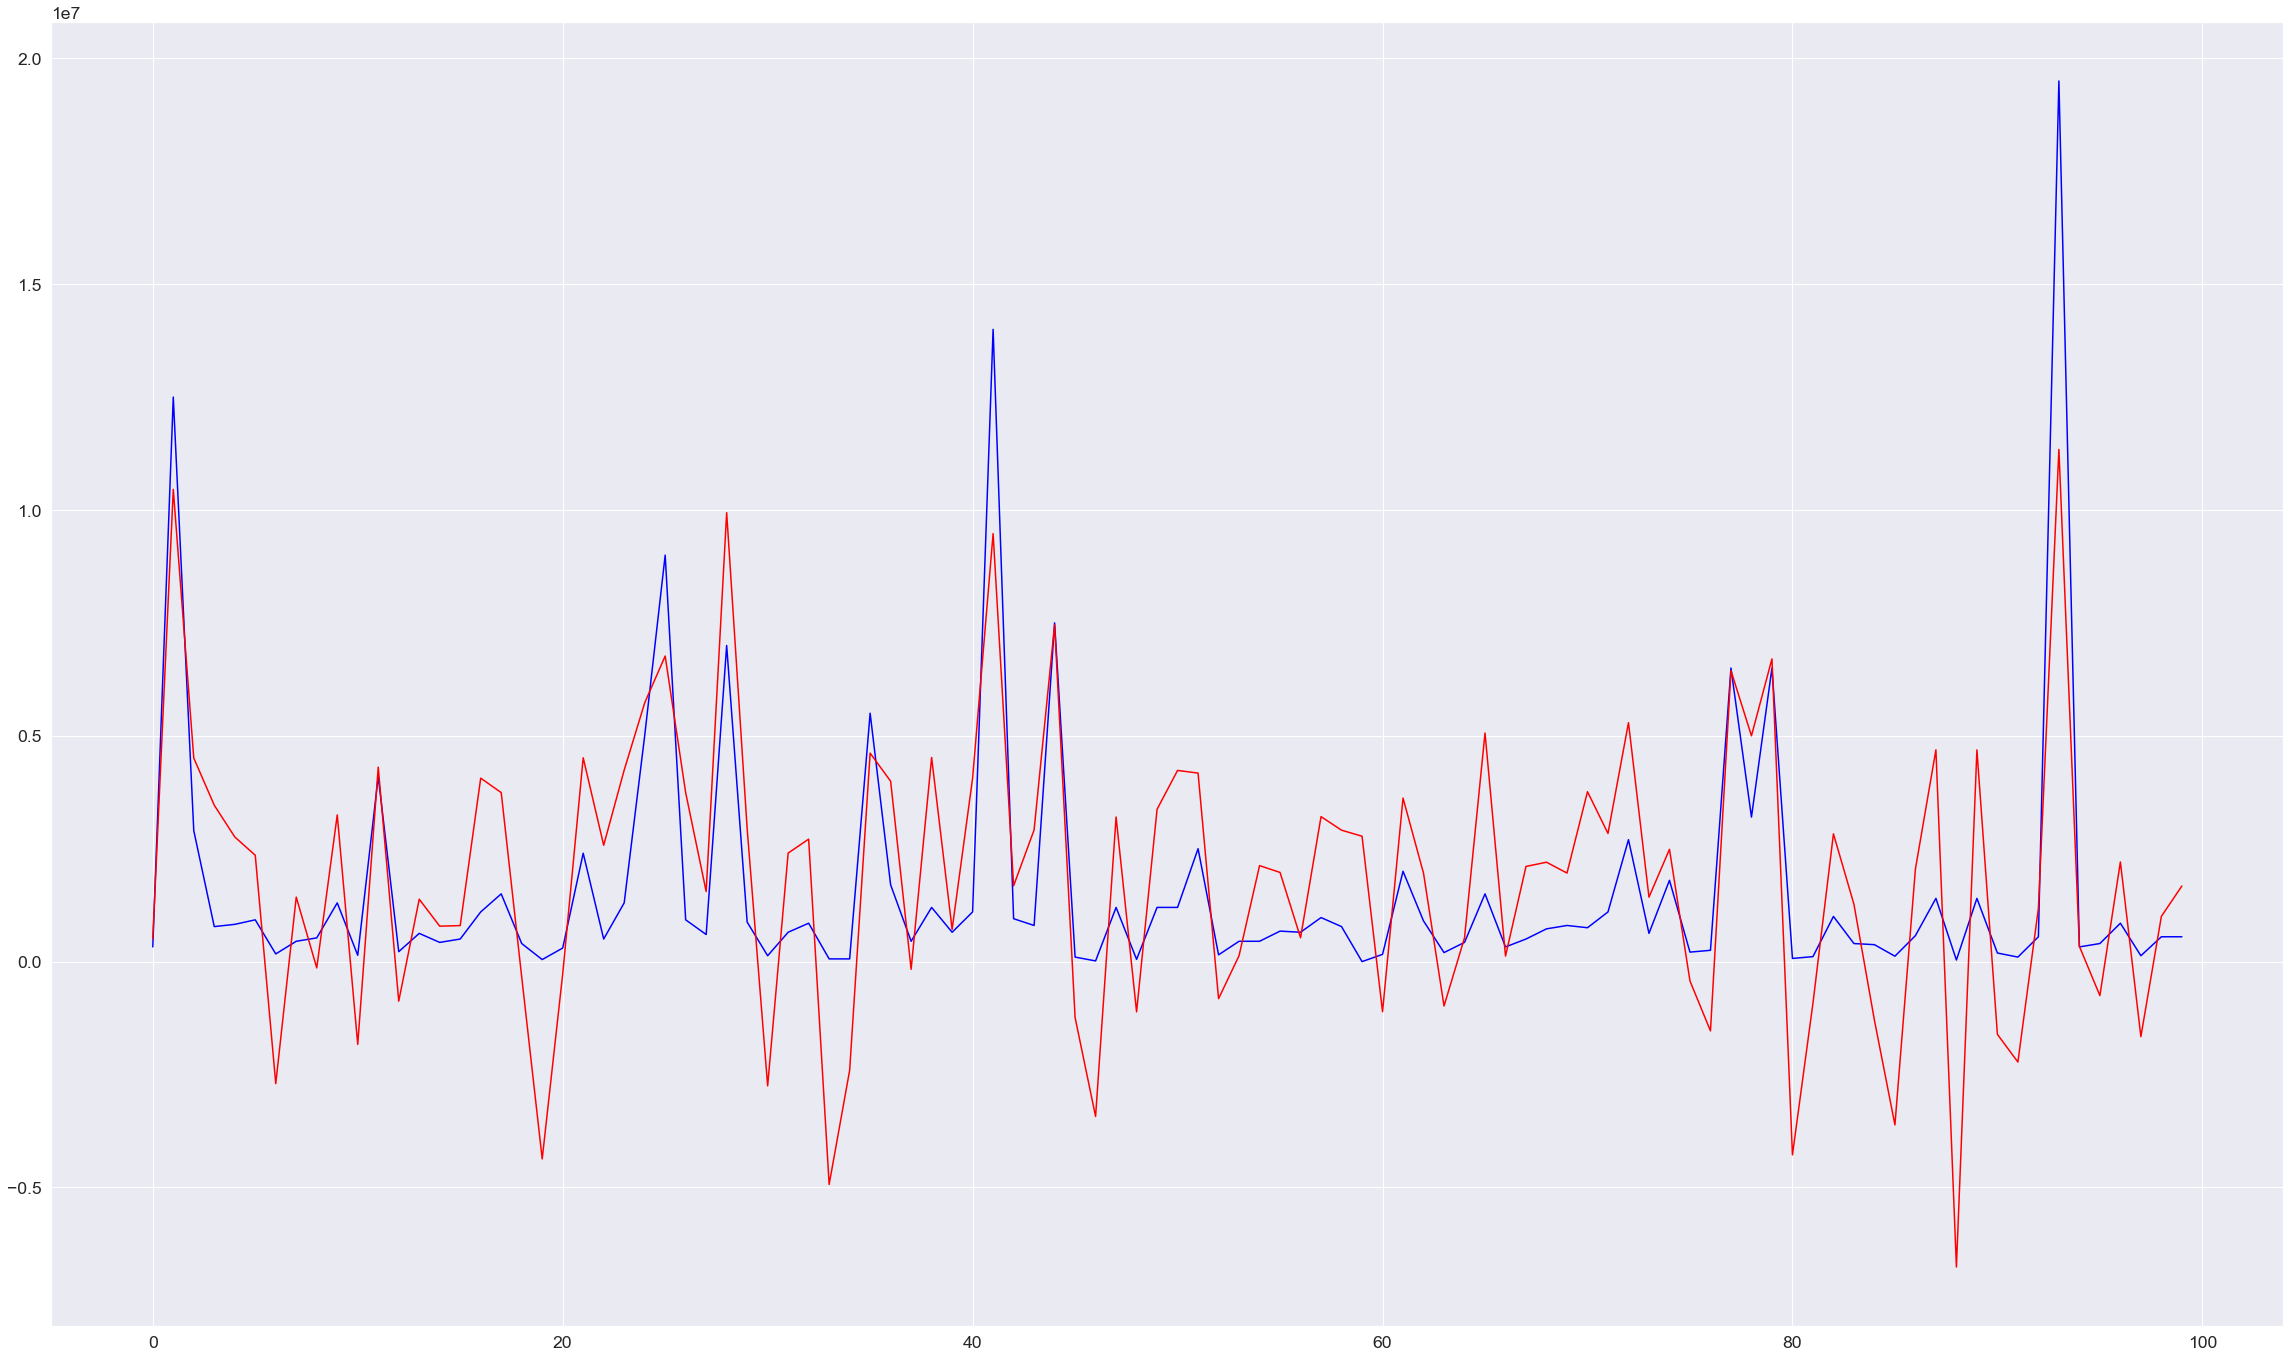

In [43]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(cv=5, normalize=True).fit(X_train[fuateres_l], y_train)
a = sorted(list(zip(abs(clf.coef_), fuateres_l,)), reverse=True)
y_pred_r = clf.predict(X_test[fuateres_l])
train_score = clf.score(X_train[fuateres_l], y_train)
test_score = clf.score(X_test[fuateres_l], y_test)
print(f"Train score: {train_score}, test_score: {test_score}")
n=100
plt.plot(range(n), y_test[0:n], c='blue')
plt.plot(range(n), y_pred_r[0:n], c='red')

- regresja dla wszystkich cech: Train score: 0.4546219280975048, test_score: 0.4775832046432017
- regresja dla wszystkich cech + utworzonych przez nas: Train score: 0.6846327606772111, test_score: 0.7030370822998129
- regresja dla 10 cech wyznaczonych metodą regresji krokowej w tył: Train score: 0.6699896605101192, test_score: 0.6991988218333024
- regresja Lasso - Train score: 0.6835338678407394, test_score: 0.7020592298997165
- regresja Ridge dla cech wybranych metodą regresji Lasso: Train score: 0.4835773206862699, test_score: 0.5054071316693258

### Metoda obliczania score:
Współczynnik determinacji $\mbox R^2$ jest określony jako (1- (u/v)), gdzie $\mbox u$ jest resztową sumą kwadratów ((y_true - y_pred)** 2)).sum() i $\mbox v$ jest całkowitą sumą kwadratów ((y_true - y_true.mean()) ** 2).sum(). Najlepszy możliwy wynik to 1,0 i może być ujemny (ponieważ model może być dowolnie gorszy). Stały model, który zawsze przewiduje oczekiwaną wartość y, pomijając cechy wejściowe, uzyskałby wynik 0,0.


**Wnioski:**
- najlepszym modelem okazał się model regresji dla wszystkich cech + cech utworzonych przez nas
- dodane przez nas cechy znacząco poprawiły wyniki modelu
- reguaryzacja cech za pomocą regresji krokowej w tył i Lasso nie obniżyła znacząco skuteczności modelu

# **postawiona teza okazała się w dużej mierze prawdziwa**

Wykazałyśmy, że wartość rynkowa piłkarza w dużym stopniu zależy od jego zdolności fizycznych.